
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

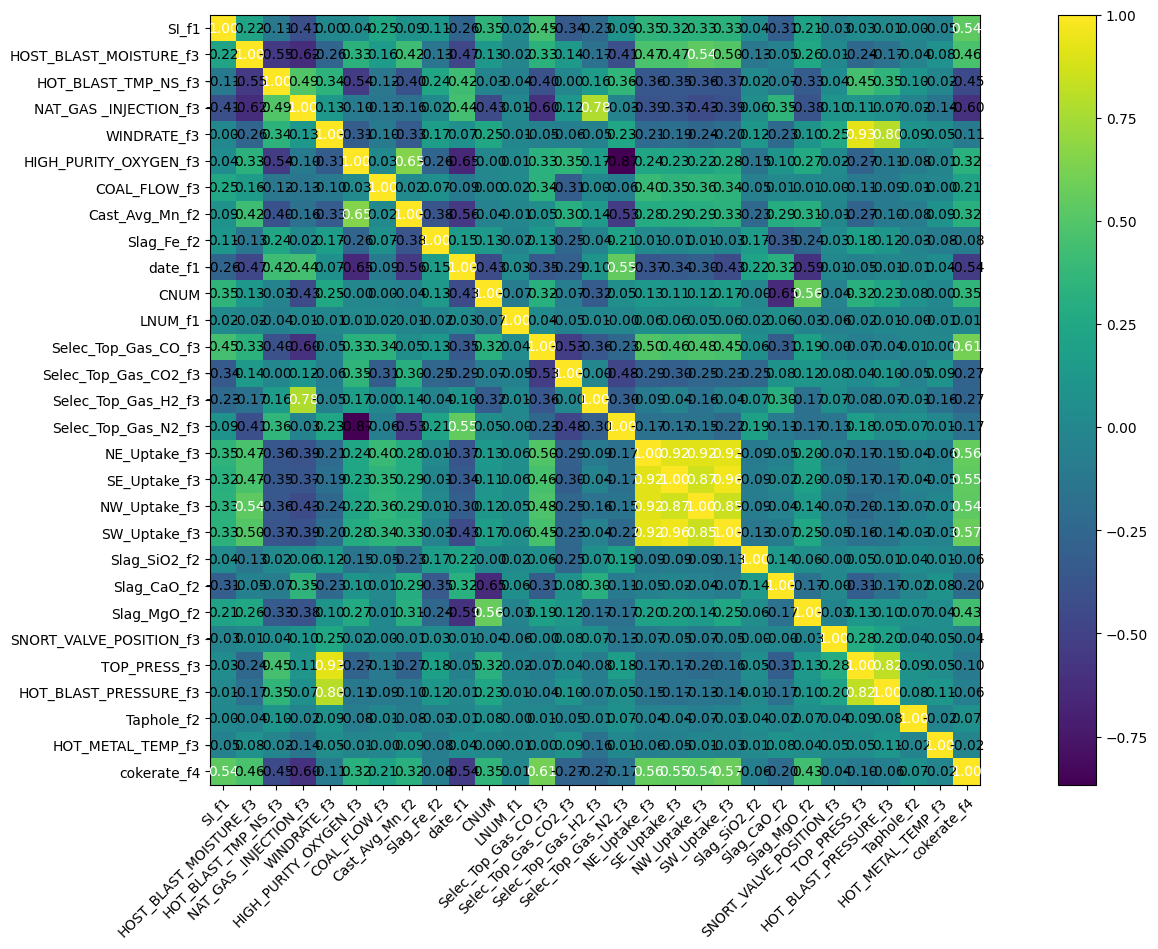

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

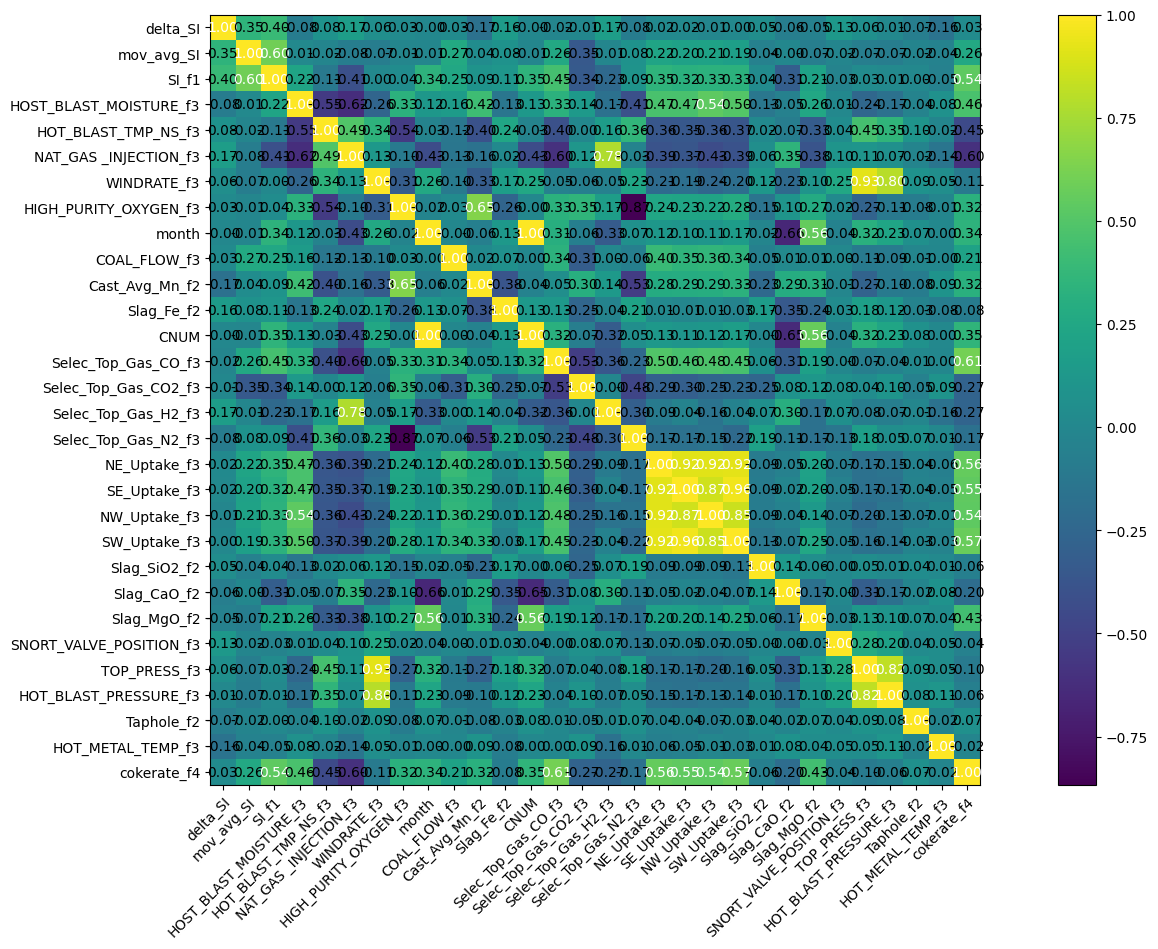

In [16]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [17]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [18]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [19]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [20]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [21]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
   
        loss_SI  = criterion(pred_si, y_si)
        ## loss_SI  = criterion(pred[:, 2], y_train[:, 2])       # special loss on feature 2
        
        loss_all = criterion(pred, y_train)

        ####################################################################################
        
        
        loss_mse = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss(pred_si, y_si)
        loss_SI = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        
        
        
        
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        

        


        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [22]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [23]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.031656
Loss_SI: 1.0282198190689087 Loss_all: 1.0625808238983154
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.100857
Loss_SI: 0.044355012476444244 Loss_all: 0.609379231929779
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.071506
Loss_SI: 0.010825791396200657 Loss_all: 0.6176272630691528
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.031890
Loss_SI: 0.006038920022547245 Loss_all: 0.2645506262779236
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.036363
Loss_SI: 0.013456935063004494 Loss_all: 0.24252229928970337
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.019251
Loss_SI: 0.004941691644489765 Loss_all: 0.14803281426429749
Prediction shape: torch.Size([32, 35])
===


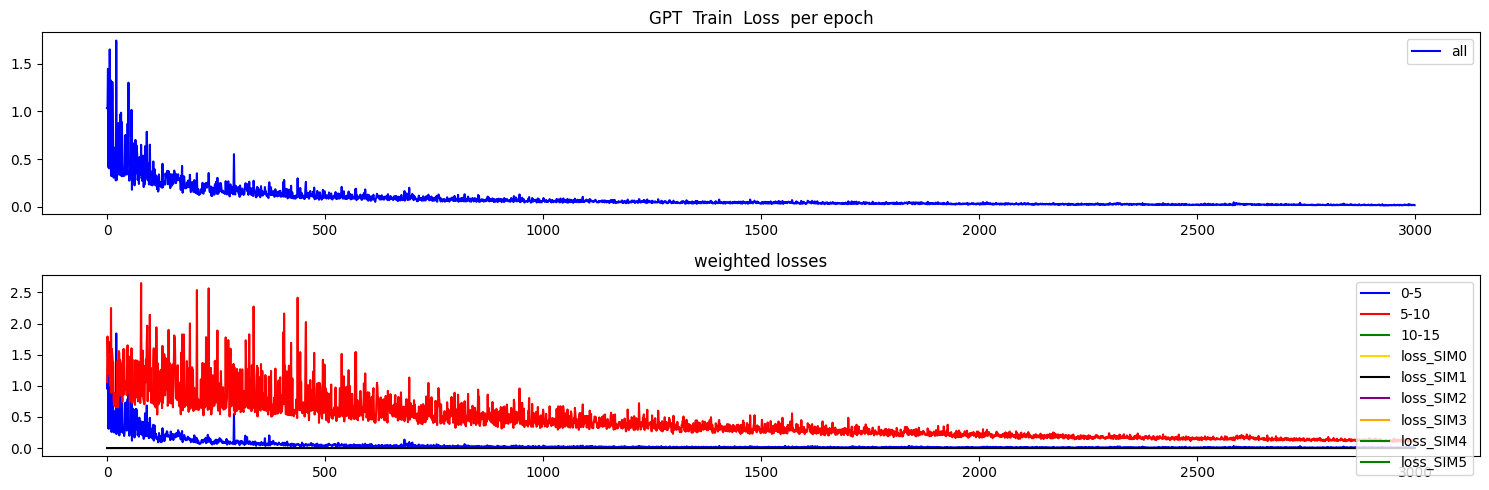

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


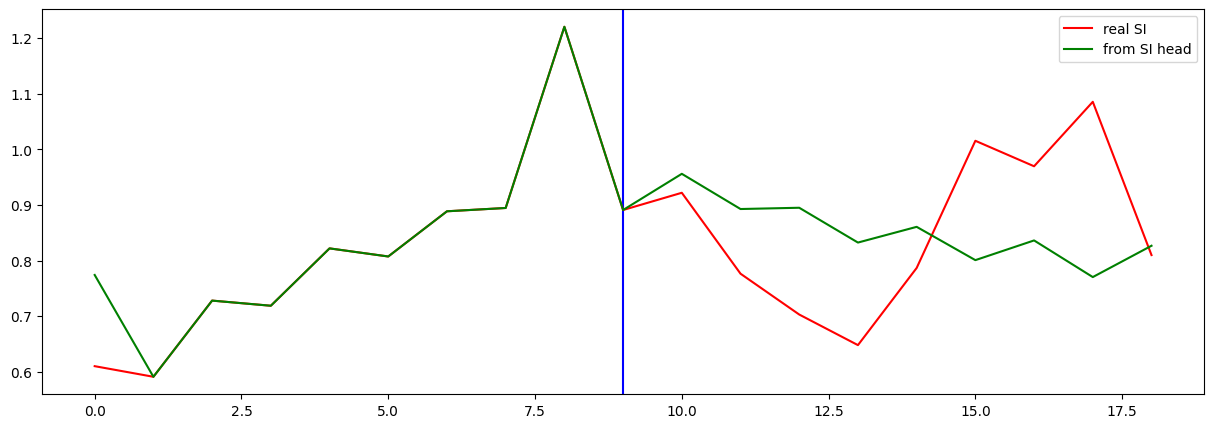

Testing R**2 - (all) - (no inputs):  0.9460147384232946
Testing R**2 - (f2) - SI full (no inputs):  -0.7868557519207156
Testing R**2 - SI head only (no inputs):  -0.32946265834322497
0 ...index R**2 (no inputs):  -0.21703644752070428
1 ...index R**2 (no inputs):  -2.2030298210912878
2 ...index R**2 (no inputs):  -0.7868557519207156
3 ...index R**2 (no inputs):  -0.19282929511545333
4 ...index R**2 (no inputs):  -0.8090485157001988
5 ...index R**2 (no inputs):  -0.9214513426244242
6 ...index R**2 (no inputs):  -1.402178108658506
7 ...index R**2 (no inputs):  -0.2792453642107289
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9208404382432316
10 ...index R**2 (no inputs):  -0.6559828456864265
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.065530888134254
16 ...index R**2 (no inputs):  -0.44239874869366647
17 ...index R**2 (no inputs):  -27.6436

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.940427
Loss_SI: 0.9470148086547852 Loss_all: 0.8811323046684265
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.125350
Loss_SI: 0.06415838748216629 Loss_all: 0.6760789155960083
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.079139
Loss_SI: 0.04701760411262512 Loss_all: 0.3682316243648529
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.060049
Loss_SI: 0.023129085078835487 Loss_all: 0.392333060503006
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.046263
Loss_SI: 0.020216388627886772 Loss_all: 0.2806793749332428
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.048608
Loss_SI: 0.01485006045550108 Loss_all: 0.3524291515350342
Prediction shape: torch.Size([32, 35])
===


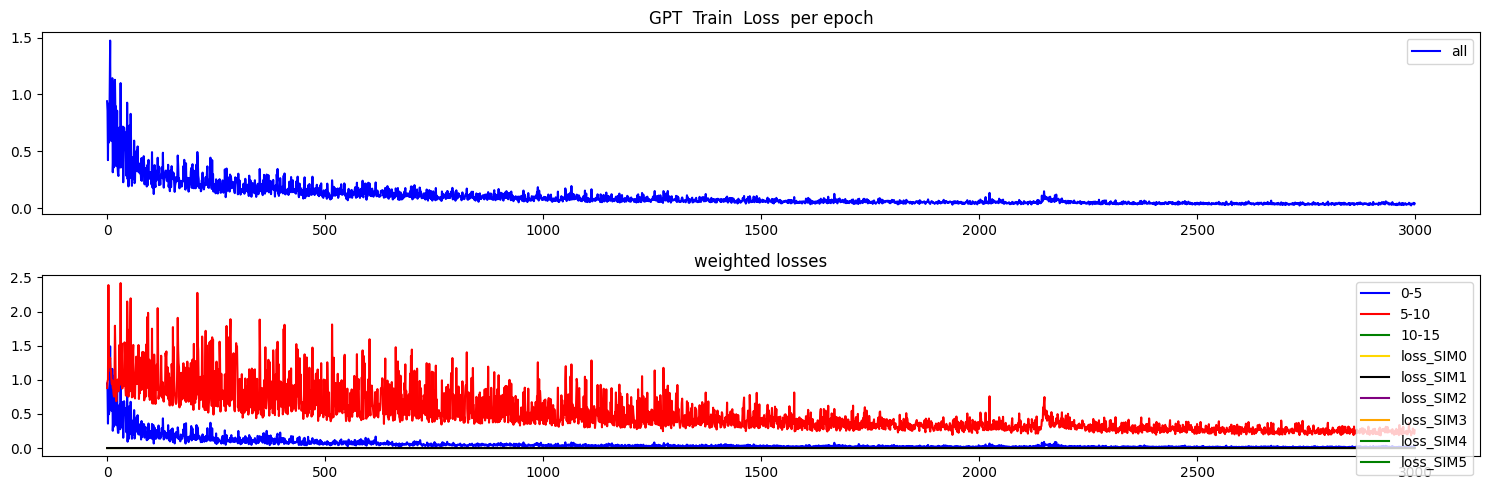

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


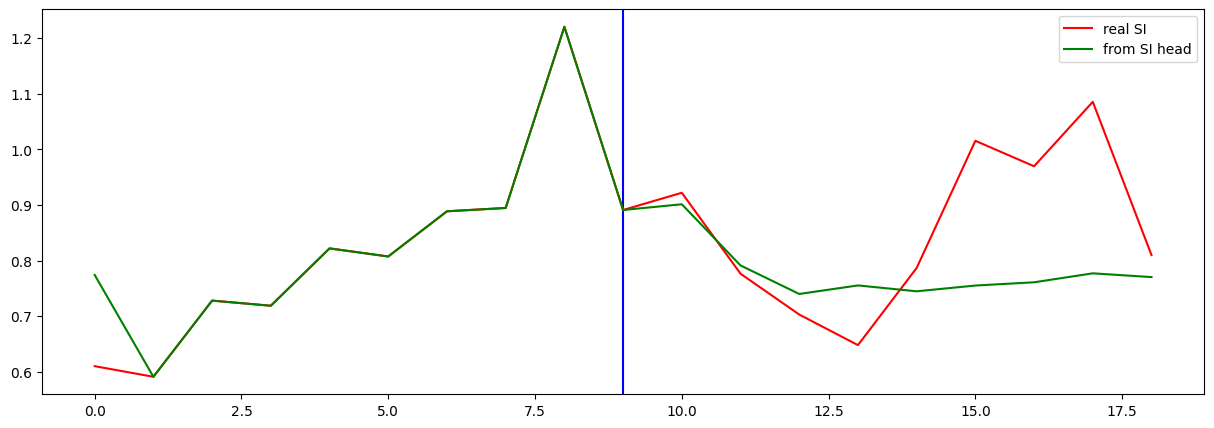

Testing R**2 - (all) - (no inputs):  0.9507355151379391
Testing R**2 - (f2) - SI full (no inputs):  -0.5797415041592313
Testing R**2 - SI head only (no inputs):  -0.2832268646635294
0 ...index R**2 (no inputs):  0.011438569023857759
1 ...index R**2 (no inputs):  -0.5747569392520722
2 ...index R**2 (no inputs):  -0.5797415041592313
3 ...index R**2 (no inputs):  -0.2334399746514897
4 ...index R**2 (no inputs):  -0.6781458867366554
5 ...index R**2 (no inputs):  -0.7508420331085195
6 ...index R**2 (no inputs):  -1.3135926084821201
7 ...index R**2 (no inputs):  -0.27924587747412444
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6385081771864118
10 ...index R**2 (no inputs):  -0.3916393299519869
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0228338007072733
16 ...index R**2 (no inputs):  -0.8266254495335223
17 ...index R**2 (no inputs):  -633.172

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.877947
Loss_SI: 0.7407582402229309 Loss_all: 2.1126468181610107
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.135574
Loss_SI: 0.10034271329641342 Loss_all: 0.45265257358551025
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.083455
Loss_SI: 0.05025907978415489 Loss_all: 0.3822140395641327
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.150352
Loss_SI: 0.05269865691661835 Loss_all: 1.0292272567749023
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.101251
Loss_SI: 0.027628250420093536 Loss_all: 0.7638524174690247
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.057674
Loss_SI: 0.019400039687752724 Loss_all: 0.4021432101726532
Prediction shape: torch.Size([32, 35])
===


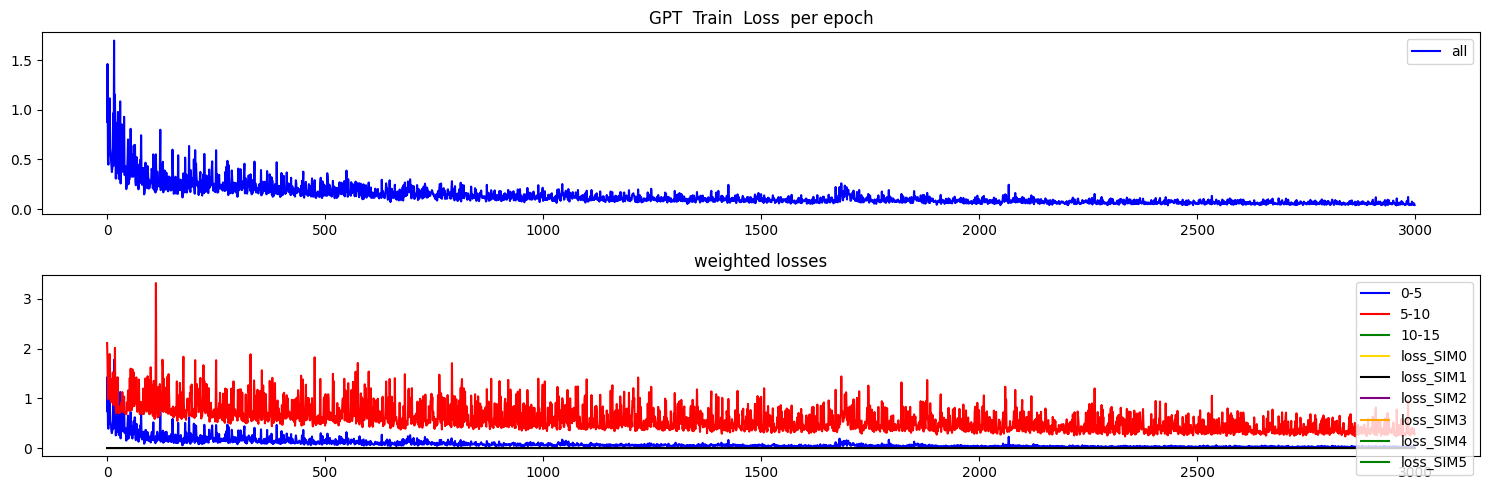

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


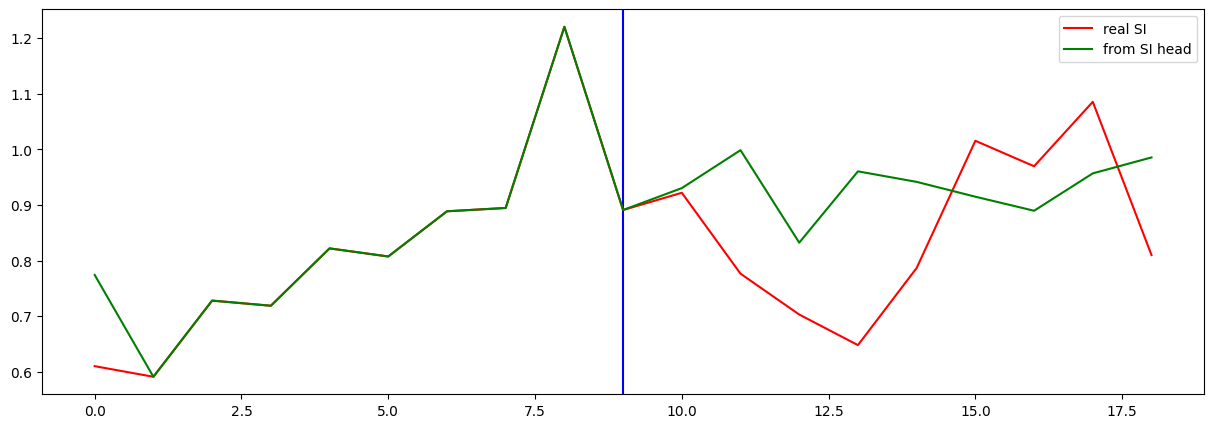

Testing R**2 - (all) - (no inputs):  0.9514238968158119
Testing R**2 - (f2) - SI full (no inputs):  -1.8050274881118118
Testing R**2 - SI head only (no inputs):  -0.7363665702045215
0 ...index R**2 (no inputs):  -0.5868677858285931
1 ...index R**2 (no inputs):  -0.9408819742067804
2 ...index R**2 (no inputs):  -1.8050274881118118
3 ...index R**2 (no inputs):  -0.35015023076427054
4 ...index R**2 (no inputs):  -0.6536163436519091
5 ...index R**2 (no inputs):  -0.7260248261839959
6 ...index R**2 (no inputs):  -0.03863584263918329
7 ...index R**2 (no inputs):  -0.2792600968168857
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.980545559227366
10 ...index R**2 (no inputs):  0.1478264145657846
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.1683520119127646
16 ...index R**2 (no inputs):  0.29912919721365727
17 ...index R**2 (no inputs):  -524.94046

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.252832
Loss_SI: 0.13213840126991272 Loss_all: 1.3390753269195557
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.191153
Loss_SI: 0.11791910231113434 Loss_all: 0.8502630591392517
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.140895
Loss_SI: 0.0935271680355072 Loss_all: 0.5672082901000977
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.097541
Loss_SI: 0.06315573304891586 Loss_all: 0.40701180696487427
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.100742
Loss_SI: 0.07205341756343842 Loss_all: 0.3589394688606262
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.102250
Loss_SI: 0.046053268015384674 Loss_all: 0.6080253720283508
Prediction shape: torch.Size([32, 35])
===


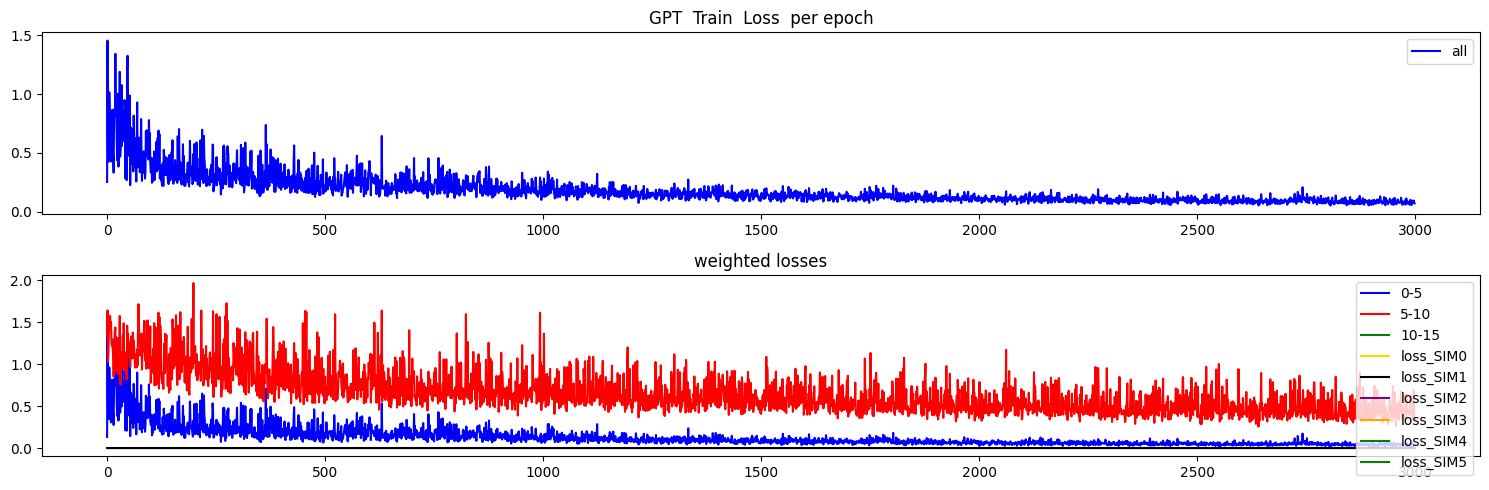

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


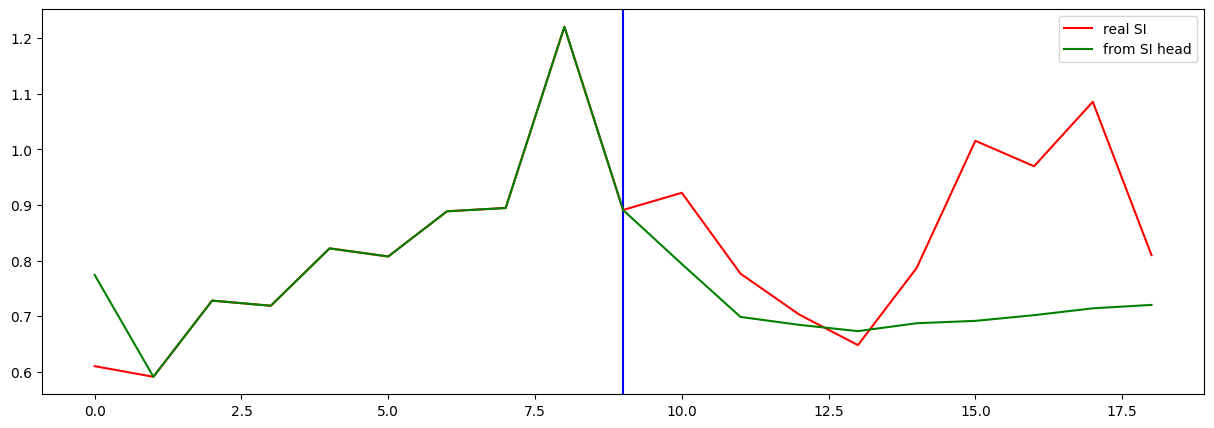

Testing R**2 - (all) - (no inputs):  0.970502304100722
Testing R**2 - (f2) - SI full (no inputs):  -0.6922138874363148
Testing R**2 - SI head only (no inputs):  -0.6618228358415739
0 ...index R**2 (no inputs):  -0.07595202126758038
1 ...index R**2 (no inputs):  -1.1562001276482667
2 ...index R**2 (no inputs):  -0.6922138874363148
3 ...index R**2 (no inputs):  -5.63949925002162
4 ...index R**2 (no inputs):  -0.9385073408633879
5 ...index R**2 (no inputs):  -0.047706053170437634
6 ...index R**2 (no inputs):  -0.6713207429728731
7 ...index R**2 (no inputs):  -0.4942123073722424
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14734671713887182
10 ...index R**2 (no inputs):  -0.24818933159270307
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.596650851049448
16 ...index R**2 (no inputs):  -1.213702817128675
17 ...index R**2 (no inputs):  -50.766601

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [28]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.660038
Loss_SI: 0.6028193235397339 Loss_all: 1.1750056743621826
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.108148
Loss_SI: 0.06041884049773216 Loss_all: 0.5377117991447449
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.062363
Loss_SI: 0.024745367467403412 Loss_all: 0.4009188413619995
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.040475
Loss_SI: 0.012657922692596912 Loss_all: 0.29082614183425903
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.033044
Loss_SI: 0.012252213433384895 Loss_all: 0.2201749086380005
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.021155
Loss_SI: 0.00717830378562212 Loss_all: 0.14695003628730774
Prediction shape: torch.Size([32, 35])
===


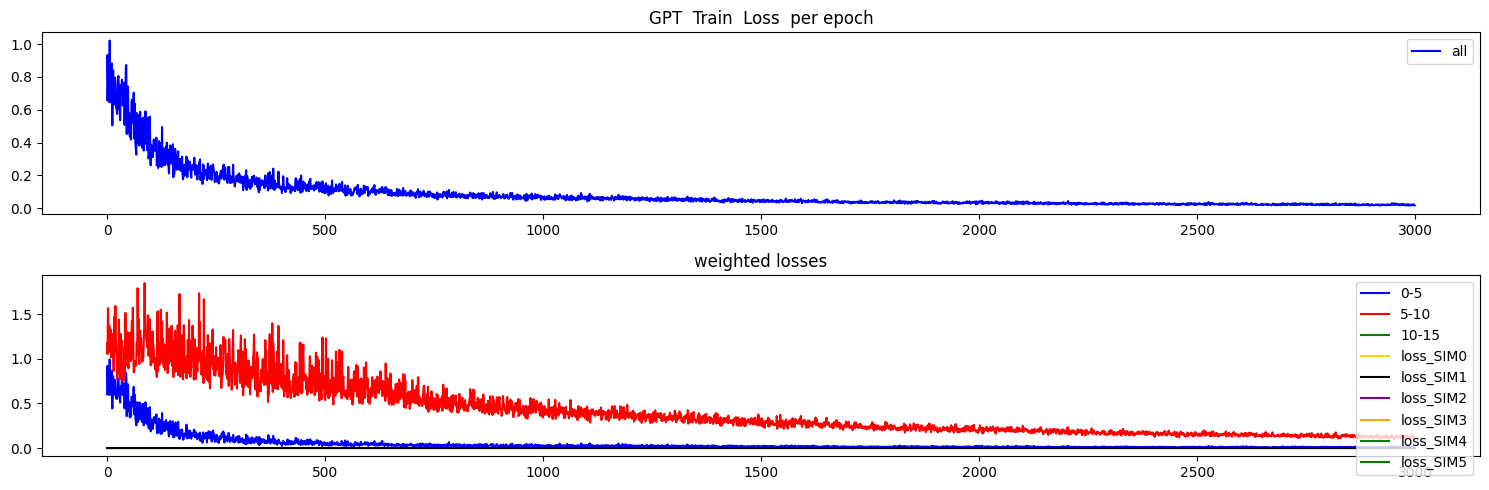

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


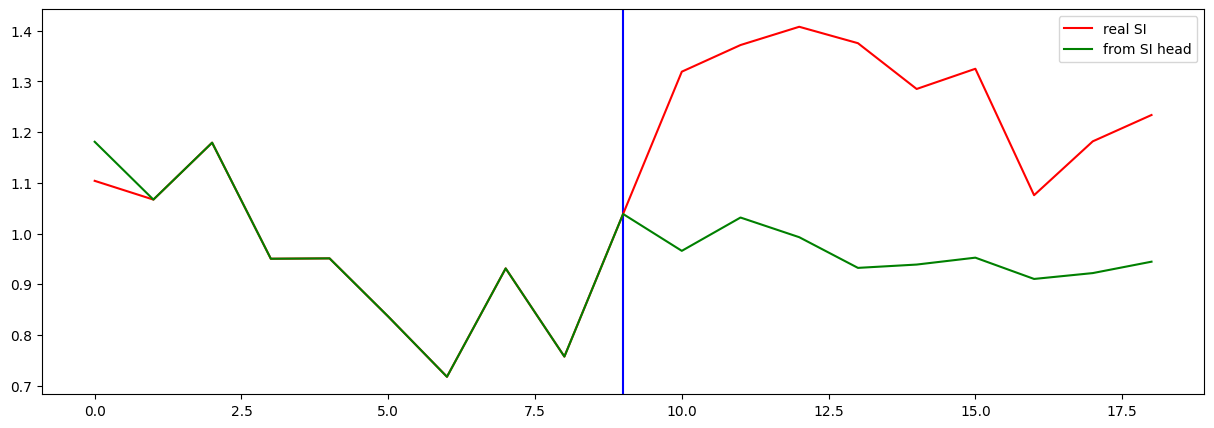

Testing R**2 - (all) - (no inputs):  0.9055157452001036
Testing R**2 - (f2) - SI full (no inputs):  -7.505761642845506
Testing R**2 - SI head only (no inputs):  -6.9747248861455775
0 ...index R**2 (no inputs):  -0.09904245234841191
1 ...index R**2 (no inputs):  -5.294241713569384
2 ...index R**2 (no inputs):  -7.505761642845506
3 ...index R**2 (no inputs):  -7.529120981961286
4 ...index R**2 (no inputs):  -0.14722603765692943
5 ...index R**2 (no inputs):  -12.919664395030006
6 ...index R**2 (no inputs):  -3.5020391067791694
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4298597852230437
10 ...index R**2 (no inputs):  -0.15605283958144045
11 ...index R**2 (no inputs):  -17.806775400883144
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.700254429504075
16 ...index R**2 (no inputs):  -0.11630861255583302
17 ...index R**2 (no inputs):  -71.5305943

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.900362
Loss_SI: 0.8527430295944214 Loss_all: 1.32892906665802
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.265872
Loss_SI: 0.2132110893726349 Loss_all: 0.7398199439048767
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.152948
Loss_SI: 0.07871083915233612 Loss_all: 0.8210808634757996
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.083404
Loss_SI: 0.037526264786720276 Loss_all: 0.4963015019893646
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.064026
Loss_SI: 0.025989847257733345 Loss_all: 0.40634819865226746
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.058437
Loss_SI: 0.025581054389476776 Loss_all: 0.35413727164268494
Prediction shape: torch.Size([32, 35])
===


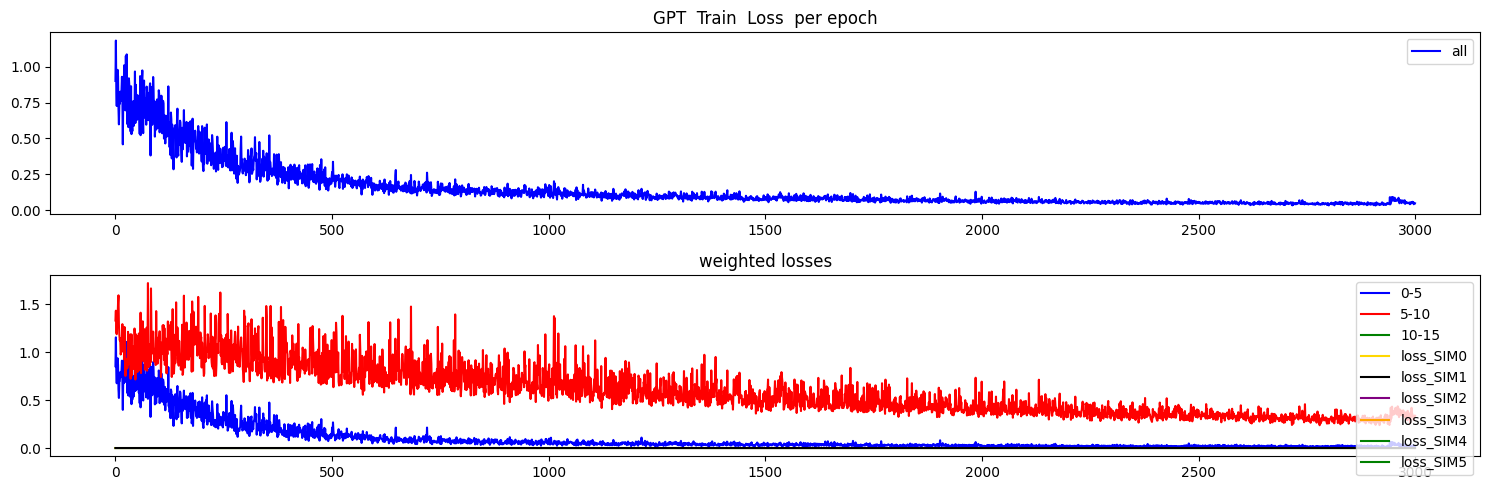

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


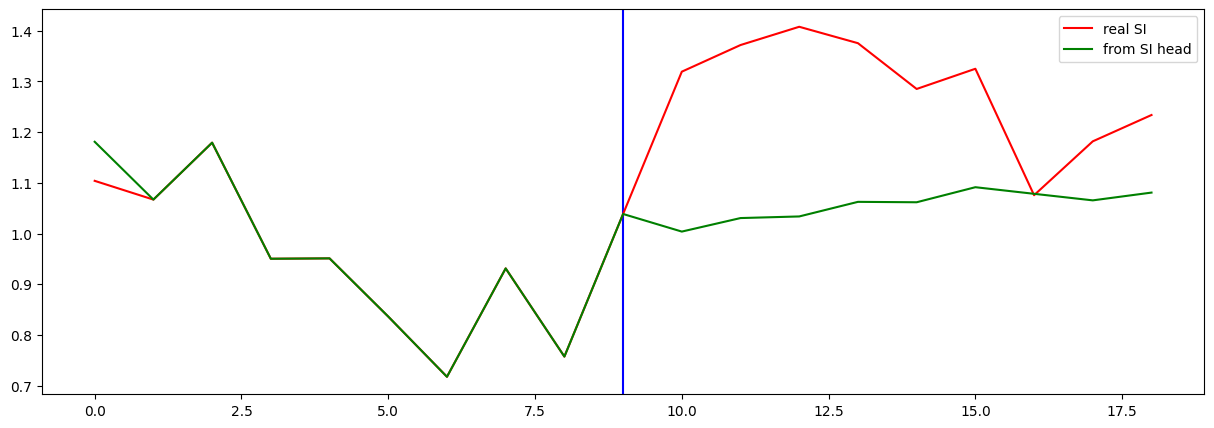

Testing R**2 - (all) - (no inputs):  0.8593962992232067
Testing R**2 - (f2) - SI full (no inputs):  -2.060890057179263
Testing R**2 - SI head only (no inputs):  -3.7038599280958318
0 ...index R**2 (no inputs):  -0.9288506830979375
1 ...index R**2 (no inputs):  -0.35276596871318056
2 ...index R**2 (no inputs):  -2.060890057179263
3 ...index R**2 (no inputs):  -3.6995285173056995
4 ...index R**2 (no inputs):  0.03447147805132822
5 ...index R**2 (no inputs):  -19.731996316744205
6 ...index R**2 (no inputs):  -6.678933609768101
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.019315203616528054
10 ...index R**2 (no inputs):  -0.18090713835670558
11 ...index R**2 (no inputs):  -21.938036494945823
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.4236282111470344
16 ...index R**2 (no inputs):  -0.006570132830432174
17 ...index R**2 (no inputs):  -32.793

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.540281
Loss_SI: 0.4794267416000366 Loss_all: 1.0879675149917603
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.380034
Loss_SI: 0.265312135219574 Loss_all: 1.412527084350586
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.149704
Loss_SI: 0.08000071346759796 Loss_all: 0.7770357728004456
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.110373
Loss_SI: 0.05444643646478653 Loss_all: 0.6137078404426575
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.087035
Loss_SI: 0.0500442311167717 Loss_all: 0.41995352506637573
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.092325
Loss_SI: 0.03368597477674484 Loss_all: 0.6200793981552124
Prediction shape: torch.Size([32, 35])
===


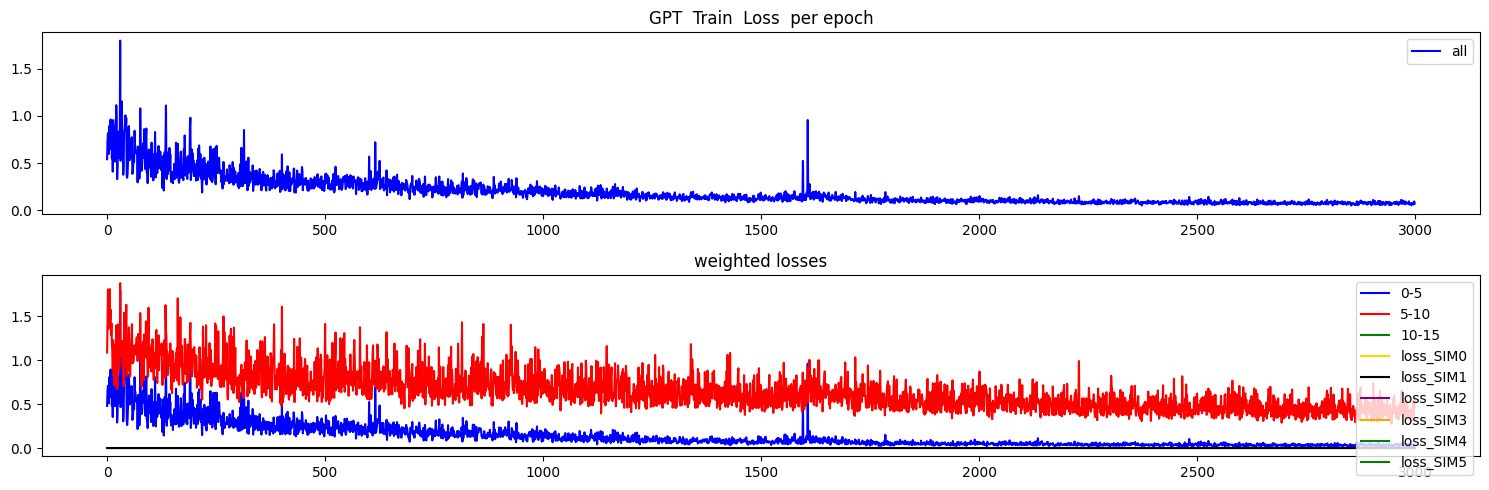

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


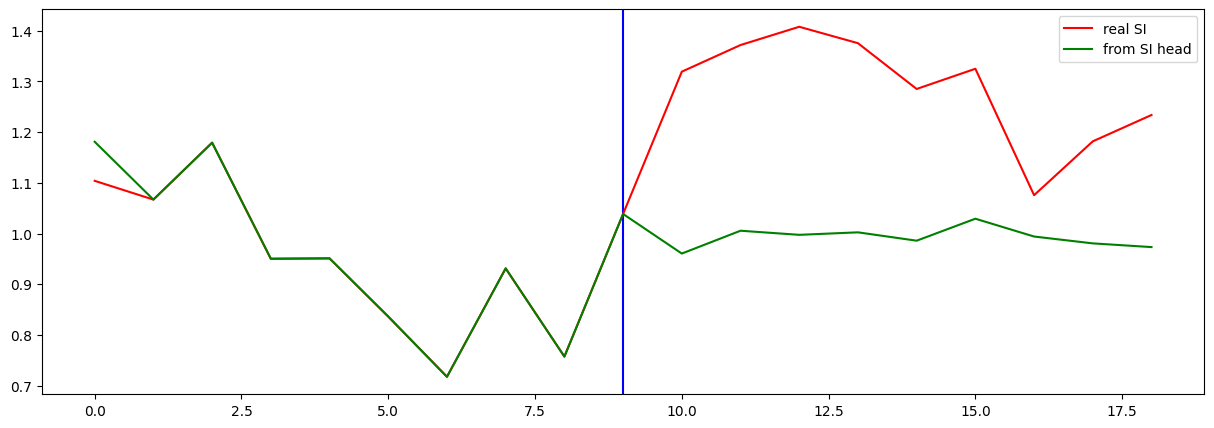

Testing R**2 - (all) - (no inputs):  0.9608746870535079
Testing R**2 - (f2) - SI full (no inputs):  -4.572664074483005
Testing R**2 - SI head only (no inputs):  -5.694502213121848
0 ...index R**2 (no inputs):  -1.6941866890287867
1 ...index R**2 (no inputs):  -4.244960878338643
2 ...index R**2 (no inputs):  -4.572664074483005
3 ...index R**2 (no inputs):  -0.17420235956218577
4 ...index R**2 (no inputs):  -1.4657637882913317
5 ...index R**2 (no inputs):  -4.758189551967765
6 ...index R**2 (no inputs):  -145.26616766911675
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.026229518052146017
10 ...index R**2 (no inputs):  -0.06750560662592542
11 ...index R**2 (no inputs):  -1033.1809691093838
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.249694332382145
16 ...index R**2 (no inputs):  -0.04699347511968166
17 ...index R**2 (no inputs):  -296.5755655

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.597818
Loss_SI: 0.5212147235870361 Loss_all: 1.287246584892273
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.417615
Loss_SI: 0.3481123447418213 Loss_all: 1.0431362390518188
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.226837
Loss_SI: 0.16956490278244019 Loss_all: 0.7422836422920227
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.196126
Loss_SI: 0.1035395935177803 Loss_all: 1.0294063091278076
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.128423
Loss_SI: 0.07146690785884857 Loss_all: 0.6410233378410339
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.095129
Loss_SI: 0.05333799868822098 Loss_all: 0.4712444841861725
Prediction shape: torch.Size([32, 35])
===


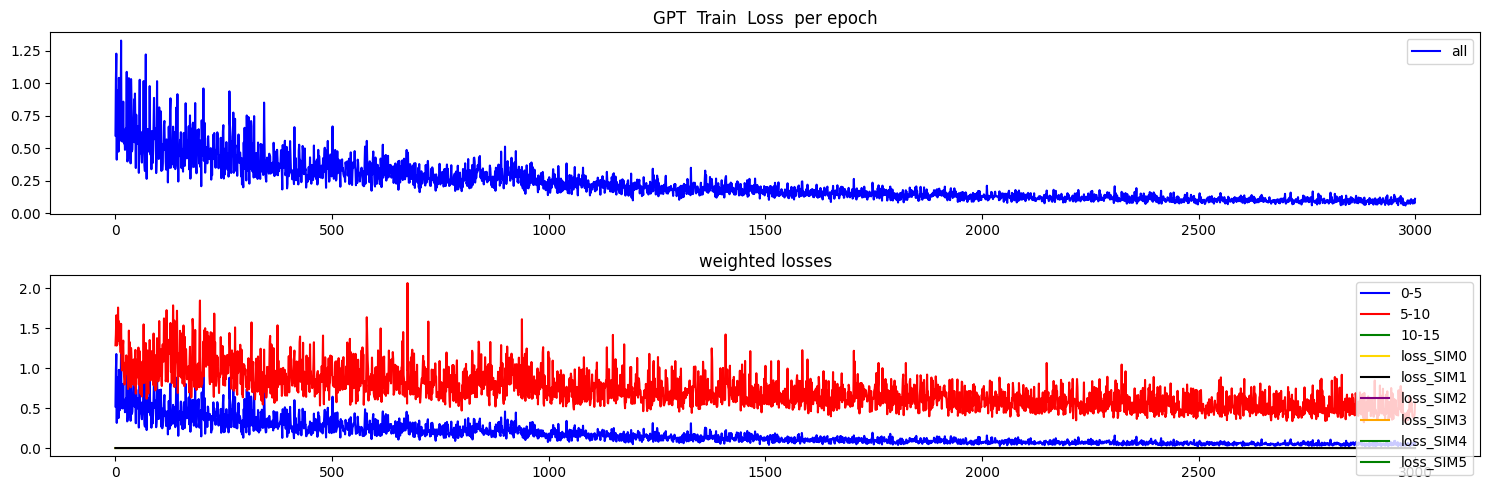

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


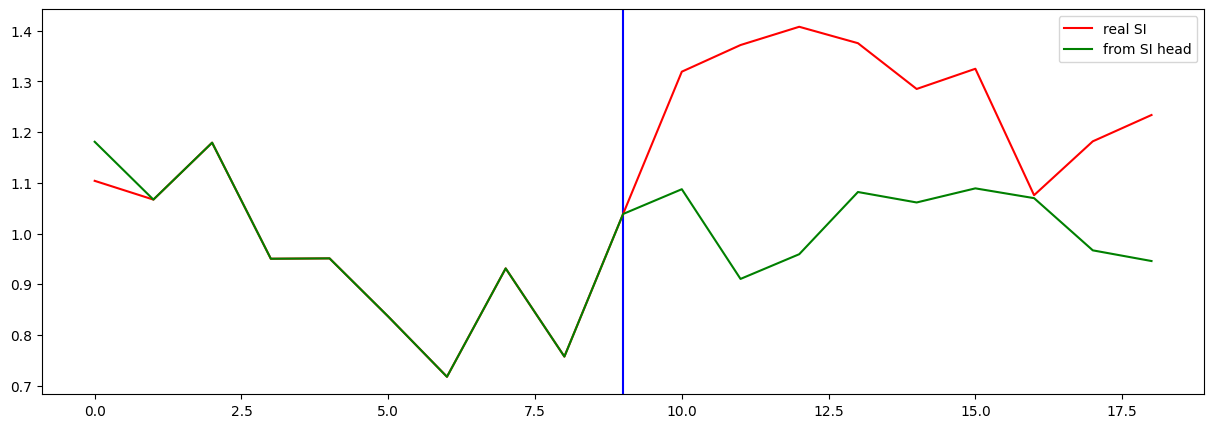

Testing R**2 - (all) - (no inputs):  0.9573988679742916
Testing R**2 - (f2) - SI full (no inputs):  -4.153971444534774
Testing R**2 - SI head only (no inputs):  -5.132526250609368
0 ...index R**2 (no inputs):  -0.750838310074817
1 ...index R**2 (no inputs):  -1.1545609510529724
2 ...index R**2 (no inputs):  -4.153971444534774
3 ...index R**2 (no inputs):  -11.628322870706523
4 ...index R**2 (no inputs):  -2.3410360165866857
5 ...index R**2 (no inputs):  -5.2735474917308505
6 ...index R**2 (no inputs):  -11.405474247902323
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0779719750189678
10 ...index R**2 (no inputs):  -0.1035047048906268
11 ...index R**2 (no inputs):  -118.99057545858848
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.400746347591191
16 ...index R**2 (no inputs):  -0.11970592447044259
17 ...index R**2 (no inputs):  -217.661546166

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [33]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.667959
Loss_SI: 0.6018228530883789 Loss_all: 1.2631840705871582
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.088236
Loss_SI: 0.025437217205762863 Loss_all: 0.653424859046936
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.049919
Loss_SI: 0.01781051605939865 Loss_all: 0.33889690041542053
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.033202
Loss_SI: 0.010466594249010086 Loss_all: 0.23782135546207428
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.032401
Loss_SI: 0.015382764860987663 Loss_all: 0.18556445837020874
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.017560
Loss_SI: 0.0073606218211352825 Loss_all: 0.10935111343860626
Prediction shape: torch.Size([32, 35])
===


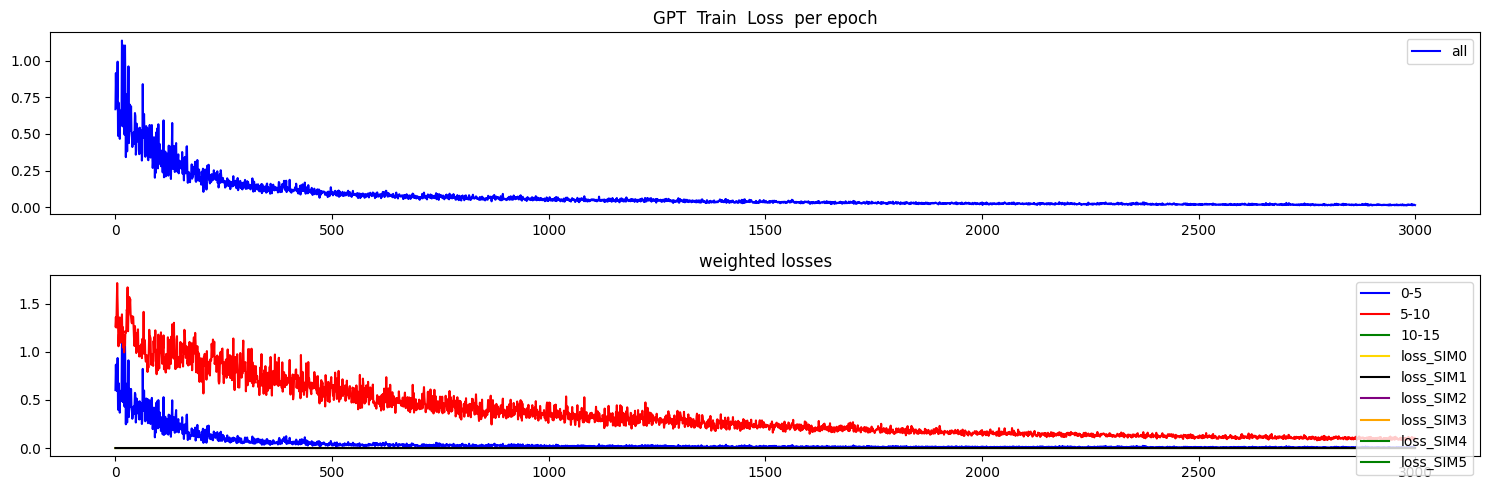

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


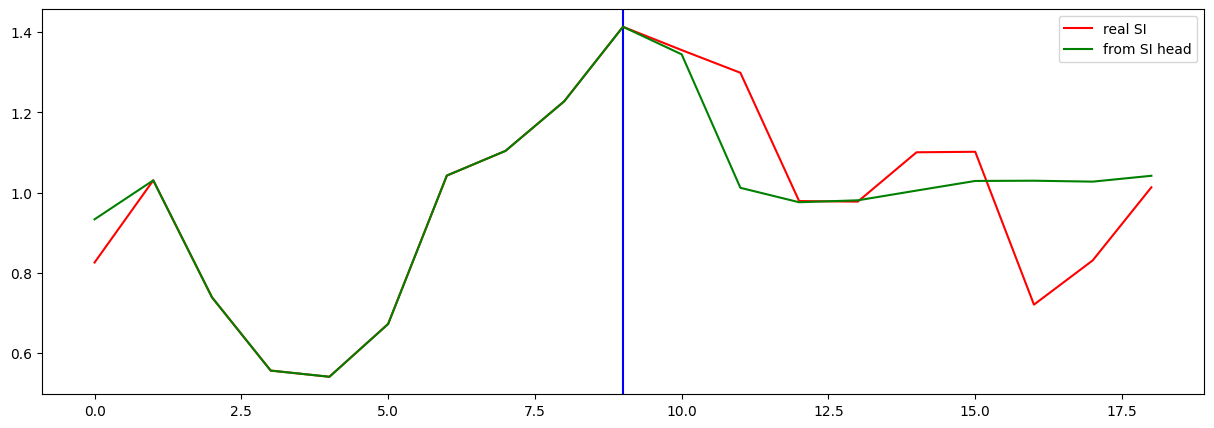

Testing R**2 - (all) - (no inputs):  0.9075067970383435
Testing R**2 - (f2) - SI full (no inputs):  -0.0841621216035946
Testing R**2 - SI head only (no inputs):  0.1501944406606165
0 ...index R**2 (no inputs):  -0.06084692455081586
1 ...index R**2 (no inputs):  0.2740568263161778
2 ...index R**2 (no inputs):  -0.0841621216035946
3 ...index R**2 (no inputs):  -17.863789999956172
4 ...index R**2 (no inputs):  -1.4937466822078305
5 ...index R**2 (no inputs):  -7.17190753234887
6 ...index R**2 (no inputs):  -87.81557670112389
7 ...index R**2 (no inputs):  -80.42921212268583
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5475126969373738
10 ...index R**2 (no inputs):  -1.209003130512492
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.601130760911659
16 ...index R**2 (no inputs):  -0.6045993833480547
17 ...index R**2 (no inputs):  -390.957842881883

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.745246
Loss_SI: 0.6999180316925049 Loss_all: 1.153201699256897
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.123203
Loss_SI: 0.07011182606220245 Loss_all: 0.6010237336158752
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.075942
Loss_SI: 0.047486647963523865 Loss_all: 0.33204400539398193
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.063897
Loss_SI: 0.026988469064235687 Loss_all: 0.3960714042186737
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.062343
Loss_SI: 0.0240554828196764 Loss_all: 0.40693241357803345
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.055604
Loss_SI: 0.02127831056714058 Loss_all: 0.3645394444465637
Prediction shape: torch.Size([32, 35])
===


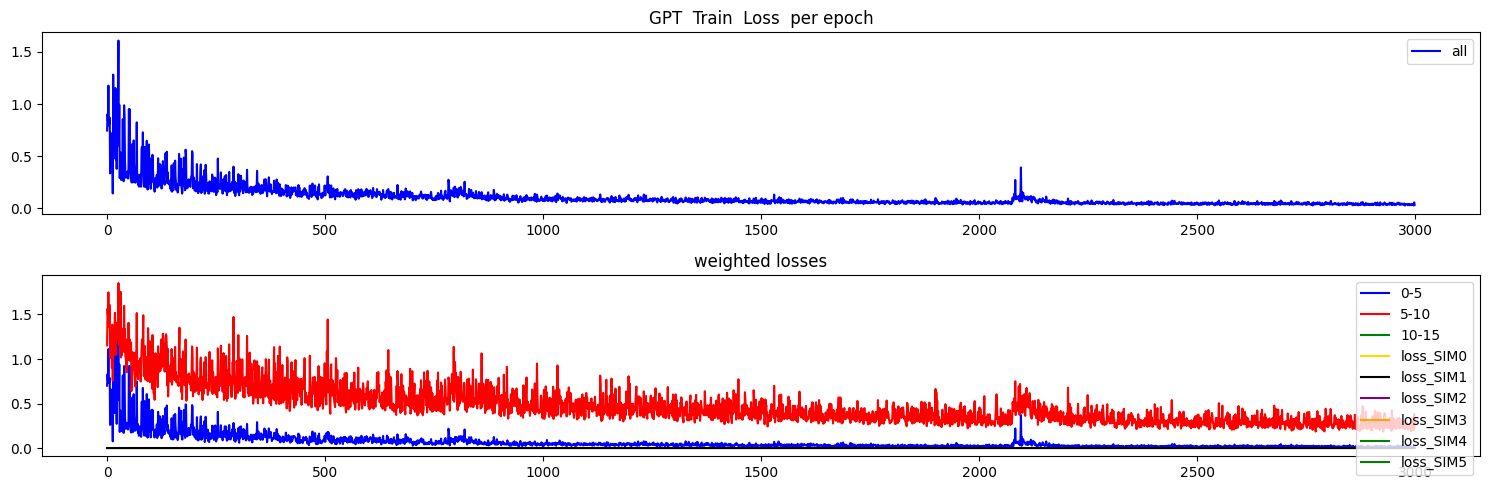

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


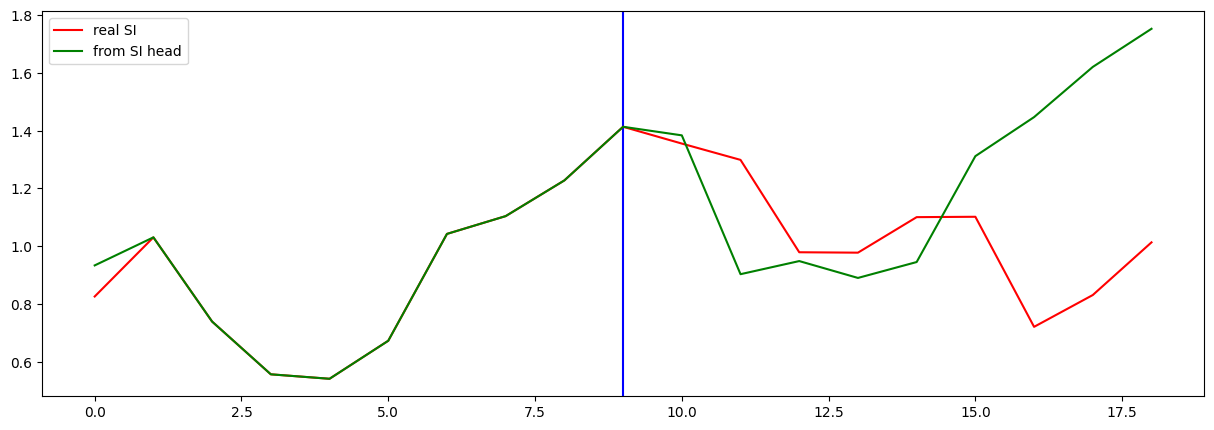

Testing R**2 - (all) - (no inputs):  0.7414977726259798
Testing R**2 - (f2) - SI full (no inputs):  -11.748344235853445
Testing R**2 - SI head only (no inputs):  -7.316471413922976
0 ...index R**2 (no inputs):  -1.462594439841677
1 ...index R**2 (no inputs):  0.17703541426110625
2 ...index R**2 (no inputs):  -11.748344235853445
3 ...index R**2 (no inputs):  -19.623527985416565
4 ...index R**2 (no inputs):  -8544.282096352132
5 ...index R**2 (no inputs):  -21.76693520630072
6 ...index R**2 (no inputs):  -36.78805598297121
7 ...index R**2 (no inputs):  -25.264052257711327
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3305156183858955
10 ...index R**2 (no inputs):  -0.05305344551293367
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.218016874801434
16 ...index R**2 (no inputs):  -0.8818053024944728
17 ...index R**2 (no inputs):  -860.6316589712

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.582057
Loss_SI: 0.4967528283596039 Loss_all: 1.3497995138168335
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.266704
Loss_SI: 0.15801873803138733 Loss_all: 1.2448707818984985
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.141772
Loss_SI: 0.07442903518676758 Loss_all: 0.747860312461853
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.110416
Loss_SI: 0.0704139918088913 Loss_all: 0.47043871879577637
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.079234
Loss_SI: 0.047973278909921646 Loss_all: 0.3605800271034241
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.051413
Loss_SI: 0.0237369816750288 Loss_all: 0.30050167441368103
Prediction shape: torch.Size([32, 35])
===


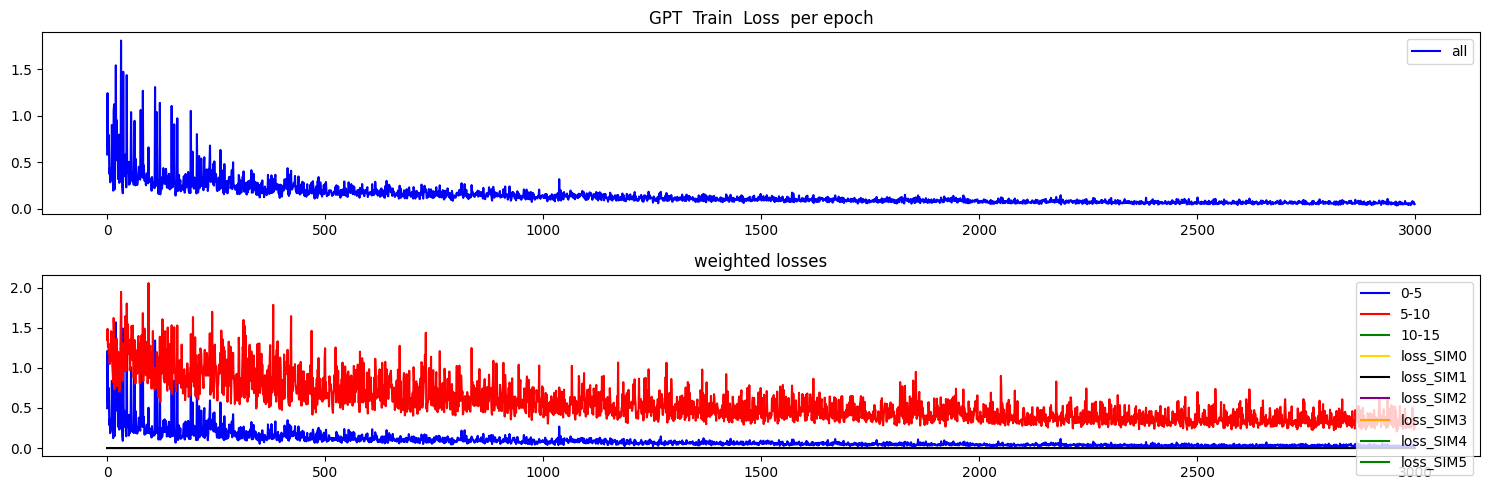

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


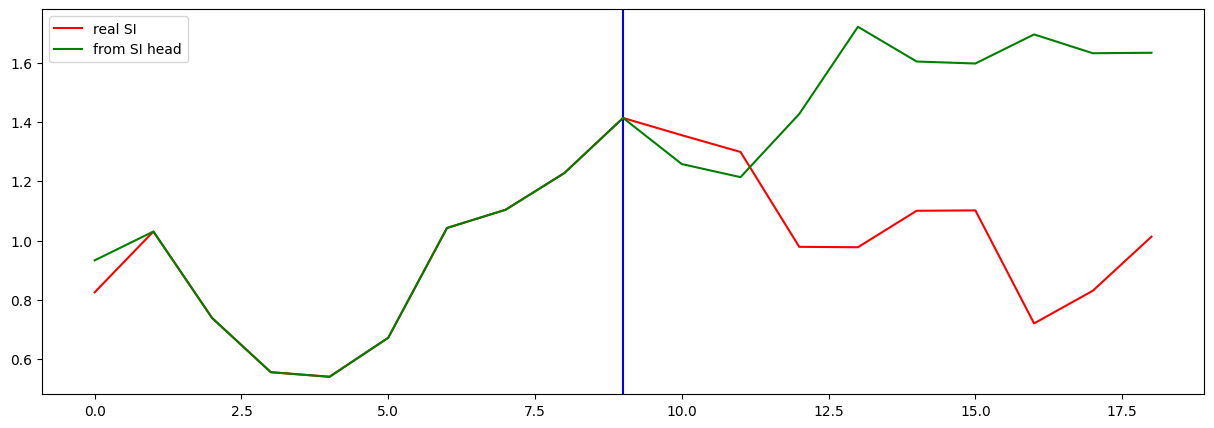

Testing R**2 - (all) - (no inputs):  0.6494699841442493
Testing R**2 - (f2) - SI full (no inputs):  -15.057828692674533
Testing R**2 - SI head only (no inputs):  -13.042726862850168
0 ...index R**2 (no inputs):  -1.3572353039416707
1 ...index R**2 (no inputs):  -2.1669126447422125
2 ...index R**2 (no inputs):  -15.057828692674533
3 ...index R**2 (no inputs):  -4.158465813714239
4 ...index R**2 (no inputs):  -11421.846543894457
5 ...index R**2 (no inputs):  -29.570929483468554
6 ...index R**2 (no inputs):  -25.991254583453475
7 ...index R**2 (no inputs):  -113.55894849953309
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22453949913157745
10 ...index R**2 (no inputs):  -0.08283198153831517
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1216348042788615
16 ...index R**2 (no inputs):  -0.13093644913922442
17 ...index R**2 (no inputs):  -10699.1

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.577379
Loss_SI: 0.534217357635498 Loss_all: 0.9658327698707581
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.164123
Loss_SI: 0.1312323808670044 Loss_all: 0.46014297008514404
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.104928
Loss_SI: 0.07841417193412781 Loss_all: 0.3435486853122711
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.115161
Loss_SI: 0.0728943794965744 Loss_all: 0.495560884475708
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.094543
Loss_SI: 0.0647718757390976 Loss_all: 0.3624863922595978
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.089222
Loss_SI: 0.054128311574459076 Loss_all: 0.4050627052783966
Prediction shape: torch.Size([32, 35])
===


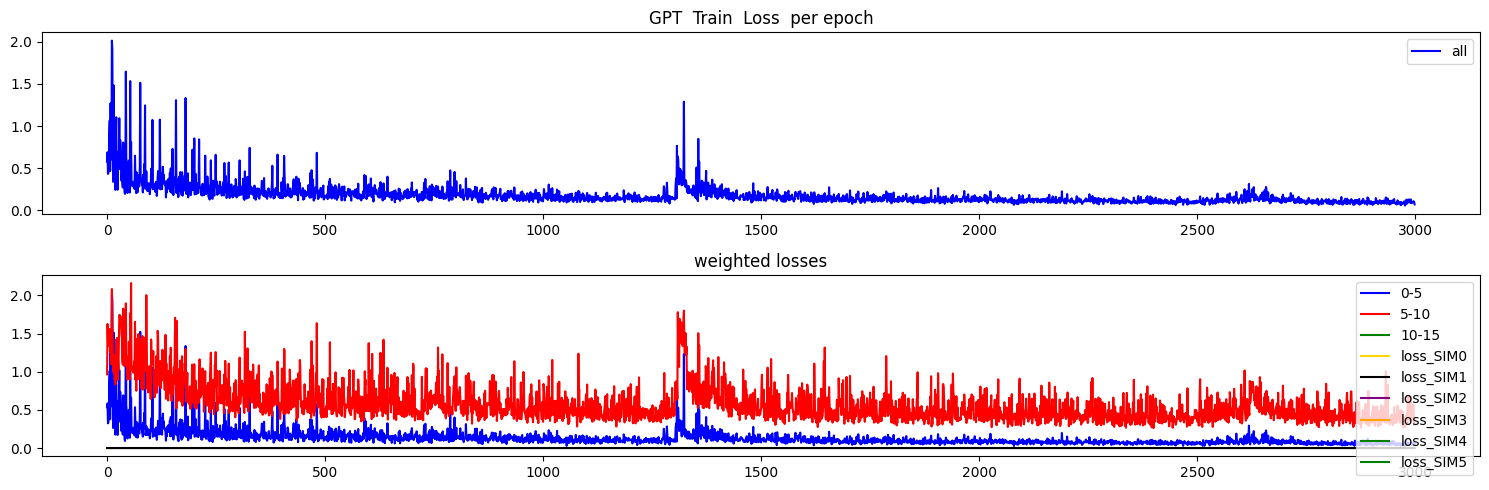

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


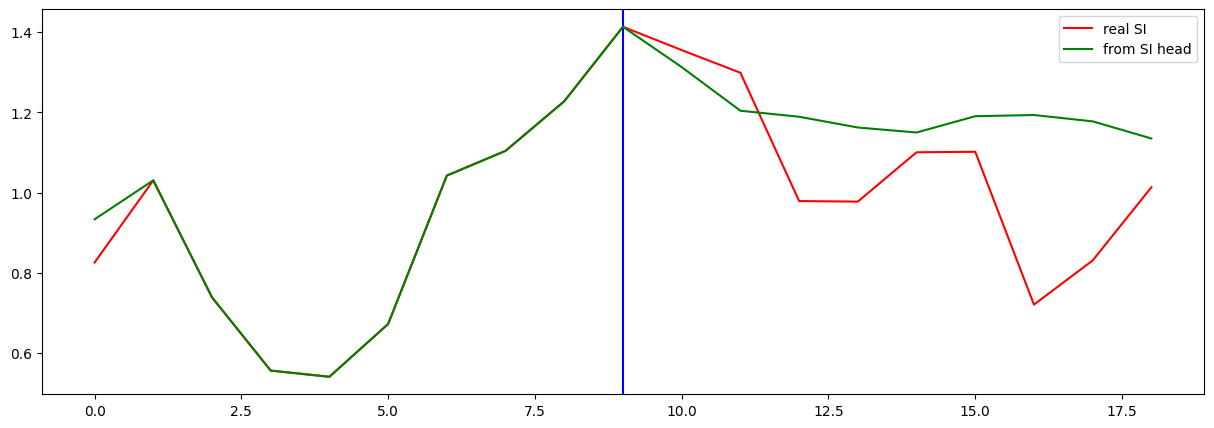

Testing R**2 - (all) - (no inputs):  0.9869354996704166
Testing R**2 - (f2) - SI full (no inputs):  -1.5926314798859282
Testing R**2 - SI head only (no inputs):  -1.3506730619205753
0 ...index R**2 (no inputs):  -0.5760935511235932
1 ...index R**2 (no inputs):  0.3784974725077894
2 ...index R**2 (no inputs):  -1.5926314798859282
3 ...index R**2 (no inputs):  -1.4974255049471106
4 ...index R**2 (no inputs):  -78.07089840093761
5 ...index R**2 (no inputs):  0.0338546129388515
6 ...index R**2 (no inputs):  -7.198132325034809
7 ...index R**2 (no inputs):  -570.0624557958511
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3621190054220731
10 ...index R**2 (no inputs):  -0.29821079232529946
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.017598453679051662
16 ...index R**2 (no inputs):  -0.13842629342557045
17 ...index R**2 (no inputs):  -7649.93110

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [38]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.922645
Loss_SI: 0.8935070037841797 Loss_all: 1.1848913431167603
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.119433
Loss_SI: 0.06220422312617302 Loss_all: 0.6344935297966003
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.061071
Loss_SI: 0.022795332595705986 Loss_all: 0.40555089712142944
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.036568
Loss_SI: 0.013867662288248539 Loss_all: 0.240871399641037
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.029078
Loss_SI: 0.013776221312582493 Loss_all: 0.16679757833480835
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.024001
Loss_SI: 0.00961269997060299 Loss_all: 0.15349142253398895
Prediction shape: torch.Size([32, 35])
===


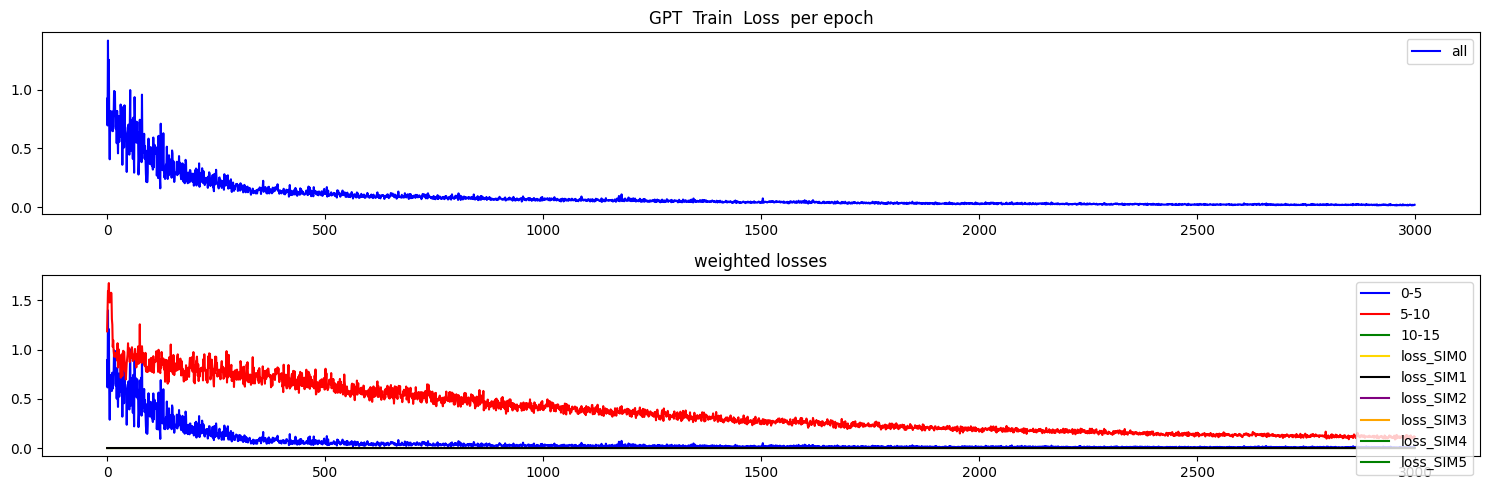

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


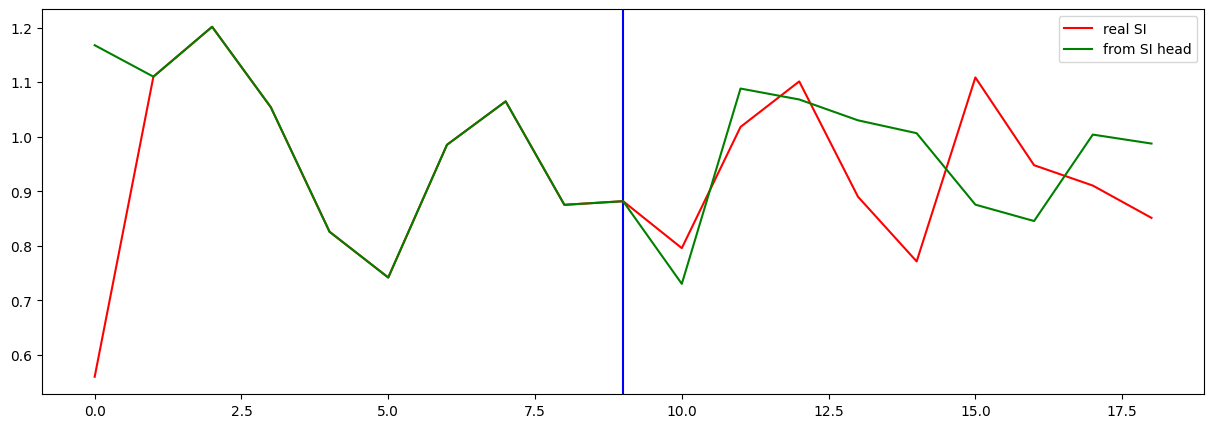

Testing R**2 - (all) - (no inputs):  0.9913530505051563
Testing R**2 - (f2) - SI full (no inputs):  -1.4340314744186151
Testing R**2 - SI head only (no inputs):  -0.7366715161475419
0 ...index R**2 (no inputs):  -1.090362807847666
1 ...index R**2 (no inputs):  -0.1924742170380358
2 ...index R**2 (no inputs):  -1.4340314744186151
3 ...index R**2 (no inputs):  -851.7261633706089
4 ...index R**2 (no inputs):  -0.4433259257464137
5 ...index R**2 (no inputs):  -0.6859974729851162
6 ...index R**2 (no inputs):  -152.04577052185343
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.961698907303618
10 ...index R**2 (no inputs):  -1.577974733852205
11 ...index R**2 (no inputs):  -65.16486135198006
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.30579673852422373
16 ...index R**2 (no inputs):  -0.08515383762032935
17 ...index R**2 (no inputs):  -64.479704506

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.777039
Loss_SI: 0.740985631942749 Loss_all: 1.1015243530273438
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.250012
Loss_SI: 0.18779891729354858 Loss_all: 0.8099344372749329
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.146674
Loss_SI: 0.07634717971086502 Loss_all: 0.779615044593811
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.084145
Loss_SI: 0.042310066521167755 Loss_all: 0.4606612026691437
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.084247
Loss_SI: 0.04815945029258728 Loss_all: 0.4090305268764496
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.048179
Loss_SI: 0.02042703703045845 Loss_all: 0.2979421615600586
Prediction shape: torch.Size([32, 35])
===


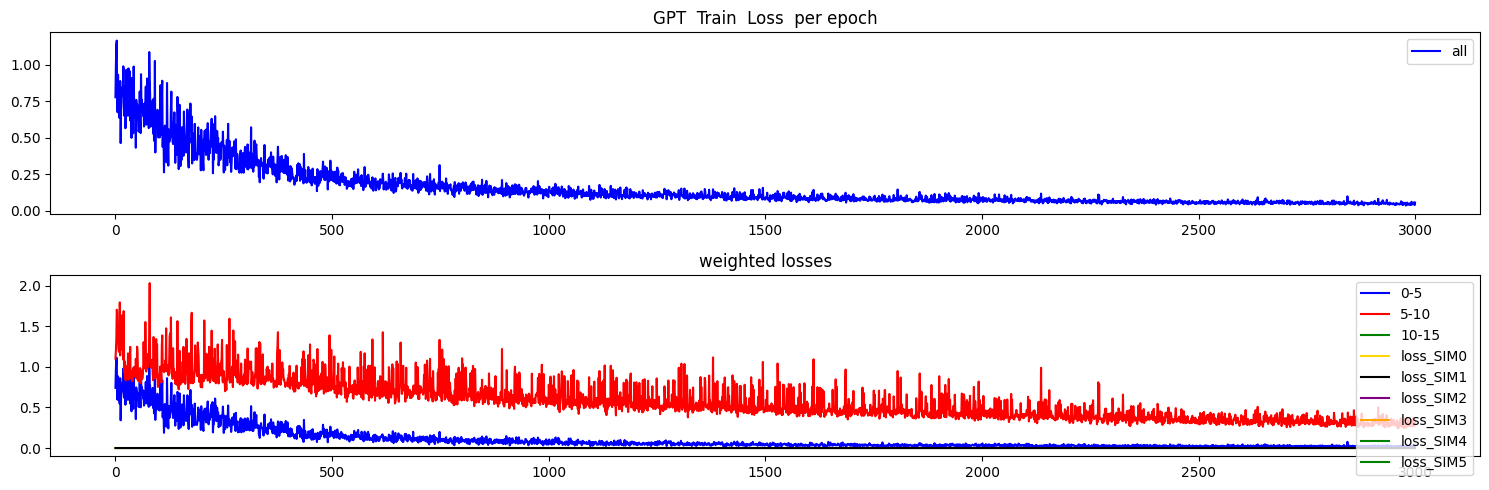

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


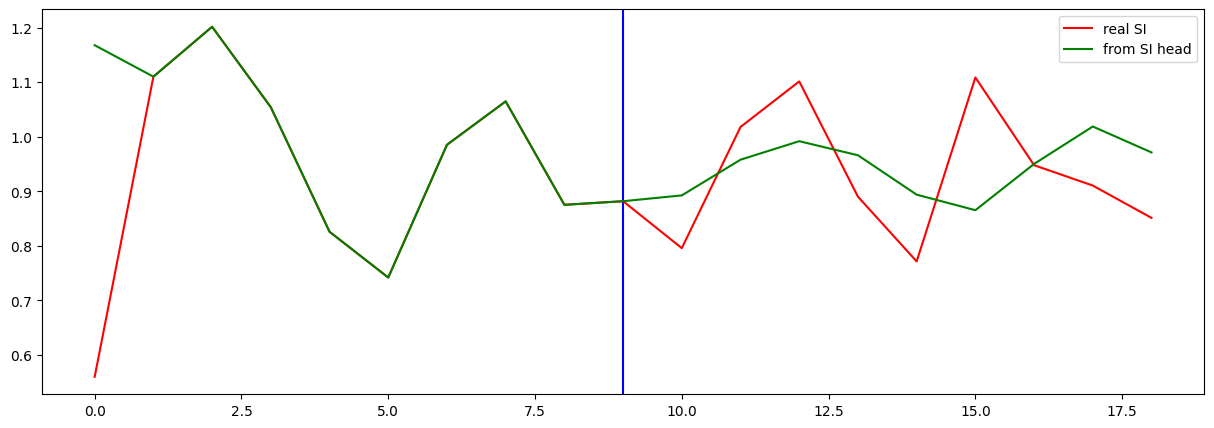

Testing R**2 - (all) - (no inputs):  0.9873868343708352
Testing R**2 - (f2) - SI full (no inputs):  -0.5265883514684278
Testing R**2 - SI head only (no inputs):  -0.4331838175443212
0 ...index R**2 (no inputs):  -0.2706478091750255
1 ...index R**2 (no inputs):  -1.2267521845624438
2 ...index R**2 (no inputs):  -0.5265883514684278
3 ...index R**2 (no inputs):  -191.6770337299796
4 ...index R**2 (no inputs):  -3.7040051839741883
5 ...index R**2 (no inputs):  -1.470292349682504
6 ...index R**2 (no inputs):  -196.77976009895255
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09101584673034546
10 ...index R**2 (no inputs):  0.1989414377936295
11 ...index R**2 (no inputs):  -293.8669690095818
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4986692868653593
16 ...index R**2 (no inputs):  -0.31872298648871866
17 ...index R**2 (no inputs):  -176.0693540

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.326625
Loss_SI: 0.27654221653938293 Loss_all: 0.7773657441139221
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.179927
Loss_SI: 0.1327231228351593 Loss_all: 0.6047590970993042
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.107305
Loss_SI: 0.061753660440444946 Loss_all: 0.5172674059867859
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.185417
Loss_SI: 0.08932965248823166 Loss_all: 1.0501983165740967
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.103562
Loss_SI: 0.07407601177692413 Loss_all: 0.3689320385456085
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.087732
Loss_SI: 0.02694537118077278 Loss_all: 0.634807288646698
Prediction shape: torch.Size([32, 35])
===


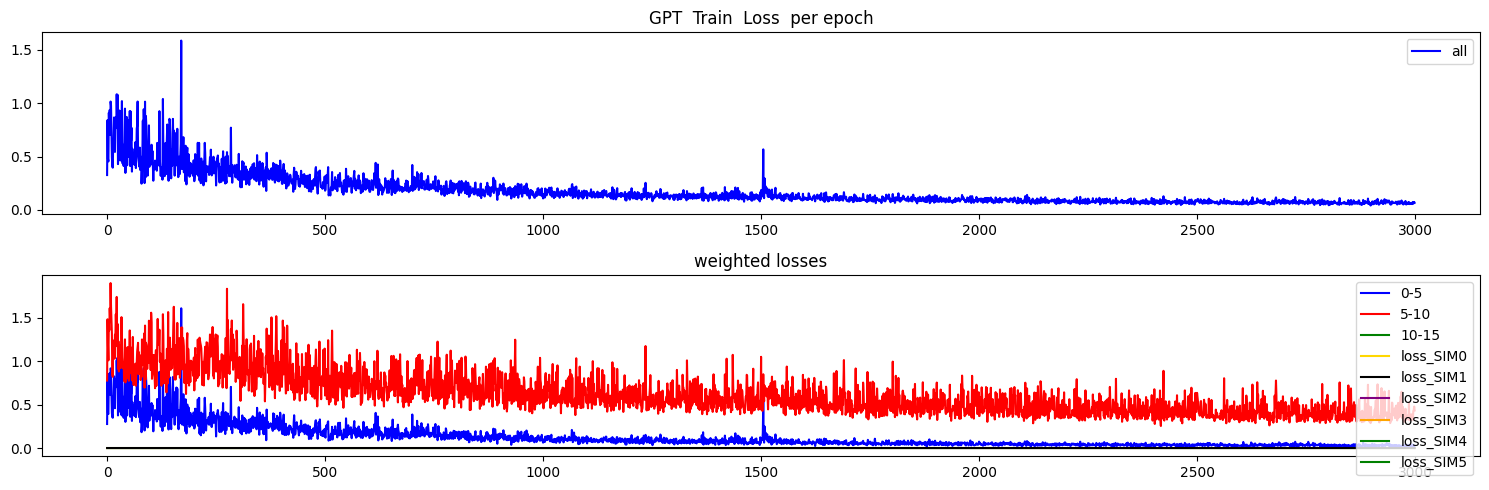

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


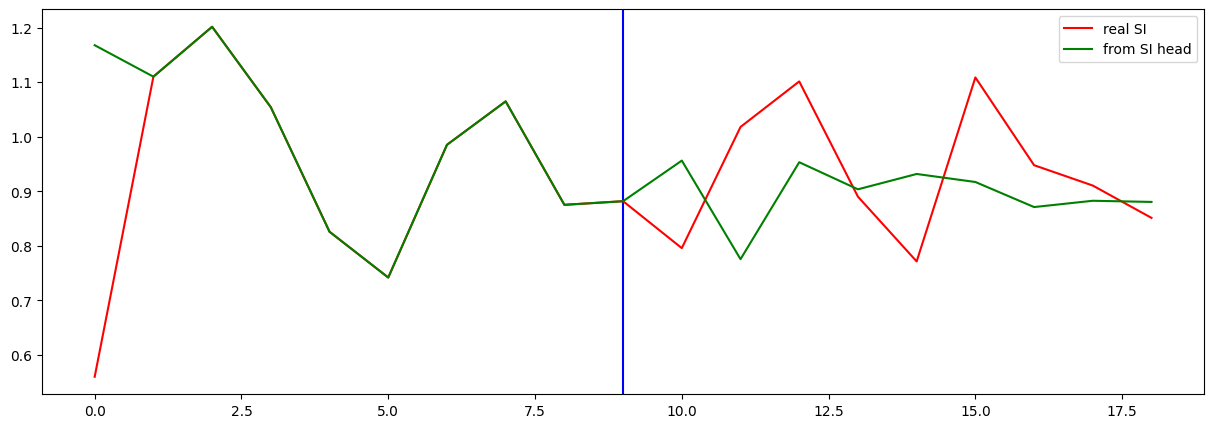

Testing R**2 - (all) - (no inputs):  0.9925698628036816
Testing R**2 - (f2) - SI full (no inputs):  -0.17085242457985705
Testing R**2 - SI head only (no inputs):  -0.14625911305463246
0 ...index R**2 (no inputs):  -0.1832013746224146
1 ...index R**2 (no inputs):  -0.08653419636301063
2 ...index R**2 (no inputs):  -0.17085242457985705
3 ...index R**2 (no inputs):  -1049.43935936501
4 ...index R**2 (no inputs):  -10.30625999694429
5 ...index R**2 (no inputs):  -0.44593572677193016
6 ...index R**2 (no inputs):  -14.425620341010823
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.02844998341954741
10 ...index R**2 (no inputs):  -0.46443071961402893
11 ...index R**2 (no inputs):  -216.87677322846145
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.2109756384413584
16 ...index R**2 (no inputs):  -0.2661487831662883
17 ...index R**2 (no inputs):  -173.25

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.656379
Loss_SI: 0.5780932903289795 Loss_all: 1.360948085784912
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.313646
Loss_SI: 0.2765038013458252 Loss_all: 0.6479266881942749
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.256921
Loss_SI: 0.20484663546085358 Loss_all: 0.7255904078483582
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.173431
Loss_SI: 0.116519495844841 Loss_all: 0.6856333017349243
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.134611
Loss_SI: 0.08609127998352051 Loss_all: 0.5712853670120239
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.135143
Loss_SI: 0.07283616811037064 Loss_all: 0.6959010362625122
Prediction shape: torch.Size([32, 35])
===


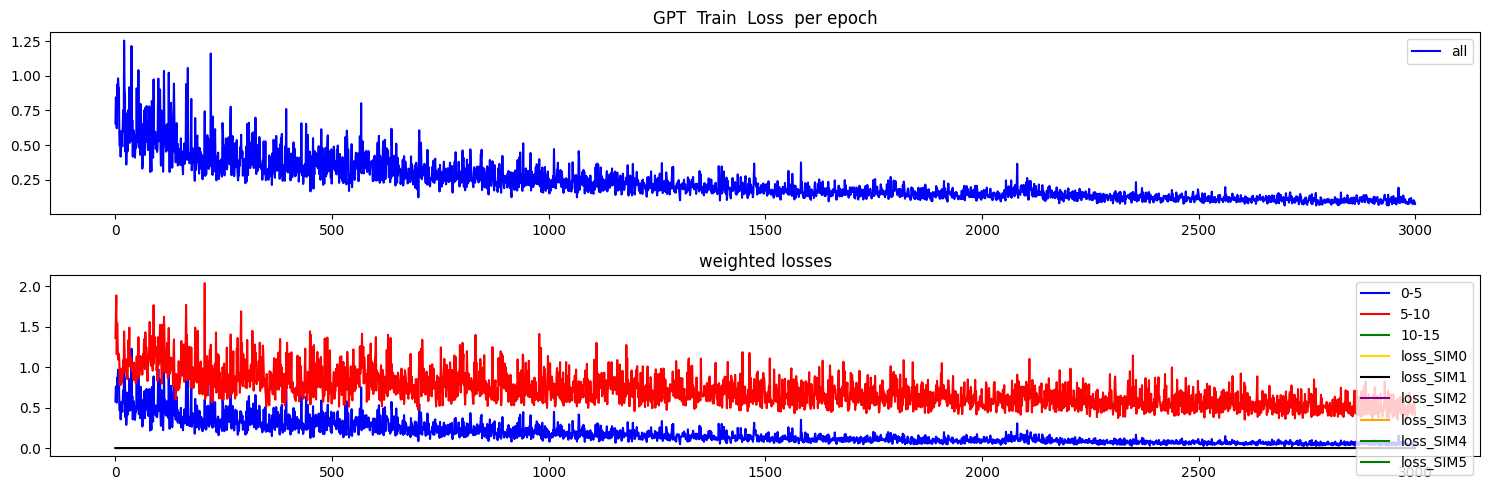

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


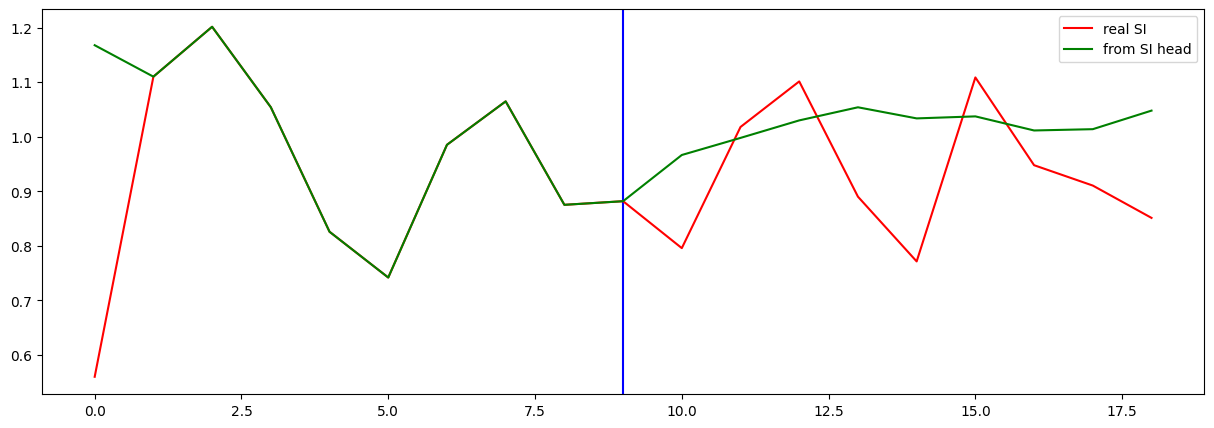

Testing R**2 - (all) - (no inputs):  0.9851805382498267
Testing R**2 - (f2) - SI full (no inputs):  -1.1857008643294025
Testing R**2 - SI head only (no inputs):  -0.7092894087634674
0 ...index R**2 (no inputs):  -0.24428557775849558
1 ...index R**2 (no inputs):  -0.7112016278739219
2 ...index R**2 (no inputs):  -1.1857008643294025
3 ...index R**2 (no inputs):  -2178.4581028109174
4 ...index R**2 (no inputs):  -40.38708507299463
5 ...index R**2 (no inputs):  -1.904904518986977
6 ...index R**2 (no inputs):  -185.73314256845768
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.02064003110200452
10 ...index R**2 (no inputs):  -0.5558767588365645
11 ...index R**2 (no inputs):  -14.443742240018967
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.377900976221508
16 ...index R**2 (no inputs):  -0.32715049081974
17 ...index R**2 (no inputs):  -53.561723922

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [43]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.034176
Loss_SI: 1.0115152597427368 Loss_all: 1.2381179332733154
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.126777
Loss_SI: 0.03352276608347893 Loss_all: 0.966064453125
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.085336
Loss_SI: 0.03498006612062454 Loss_all: 0.5385390520095825
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.043859
Loss_SI: 0.01688116043806076 Loss_all: 0.2866586446762085
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.031536
Loss_SI: 0.010344509035348892 Loss_all: 0.2222619205713272
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.027959
Loss_SI: 0.014216387644410133 Loss_all: 0.15164069831371307
Prediction shape: torch.Size([32, 35])
===


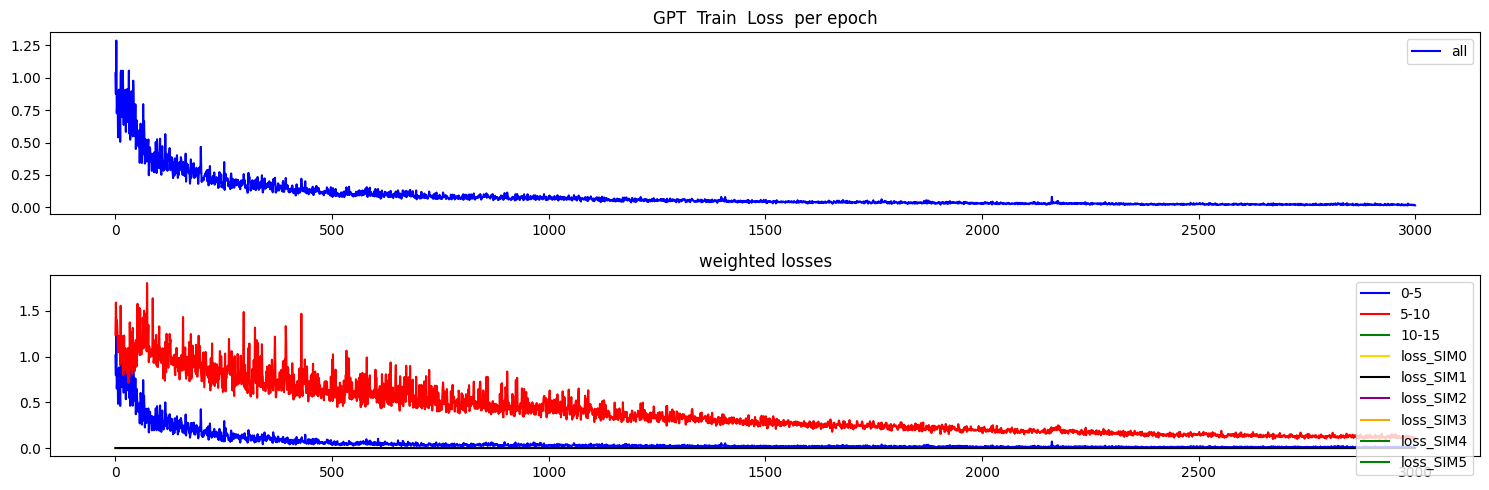

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


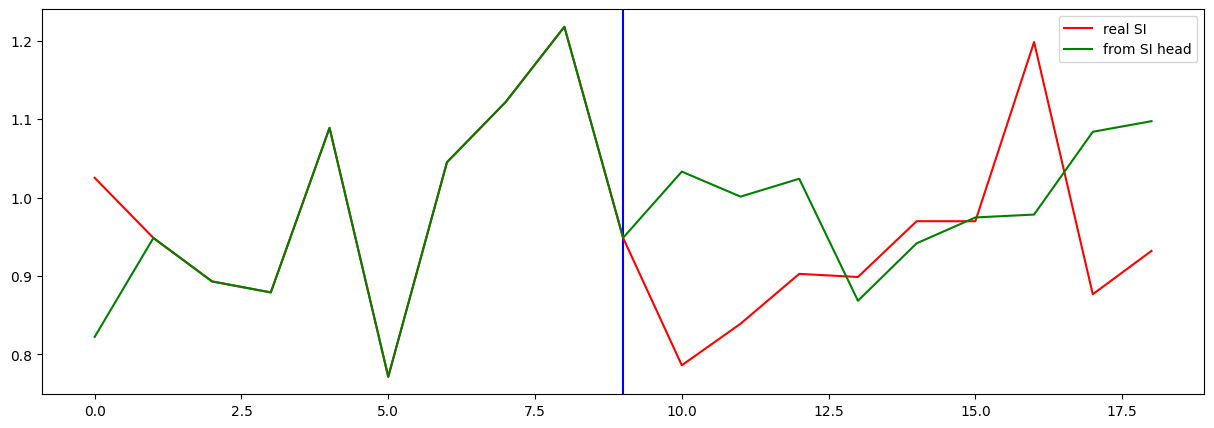

Testing R**2 - (all) - (no inputs):  0.9992383609361156
Testing R**2 - (f2) - SI full (no inputs):  -1.1342956678089835
Testing R**2 - SI head only (no inputs):  -0.7977829040406872
0 ...index R**2 (no inputs):  -0.8997334100577568
1 ...index R**2 (no inputs):  -0.7364598007089522
2 ...index R**2 (no inputs):  -1.1342956678089835
3 ...index R**2 (no inputs):  -12.829022740554473
4 ...index R**2 (no inputs):  -1.4219425519854472
5 ...index R**2 (no inputs):  -1.750012399629243
6 ...index R**2 (no inputs):  -7.859125586109947
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.850258005701977
10 ...index R**2 (no inputs):  0.06149612363058643
11 ...index R**2 (no inputs):  -3.4615296886356326
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.323567056438901
16 ...index R**2 (no inputs):  0.22591454732649596
17 ...index R**2 (no inputs):  -5.91706134575

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.401734
Loss_SI: 0.31369203329086304 Loss_all: 1.1941083669662476
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.158786
Loss_SI: 0.11400258541107178 Loss_all: 0.5618371963500977
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.121393
Loss_SI: 0.07110536843538284 Loss_all: 0.5739851593971252
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.090746
Loss_SI: 0.04485251009464264 Loss_all: 0.5037826895713806
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.058430
Loss_SI: 0.02694717049598694 Loss_all: 0.341774046421051
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.048021
Loss_SI: 0.02049328200519085 Loss_all: 0.29576733708381653
Prediction shape: torch.Size([32, 35])
===


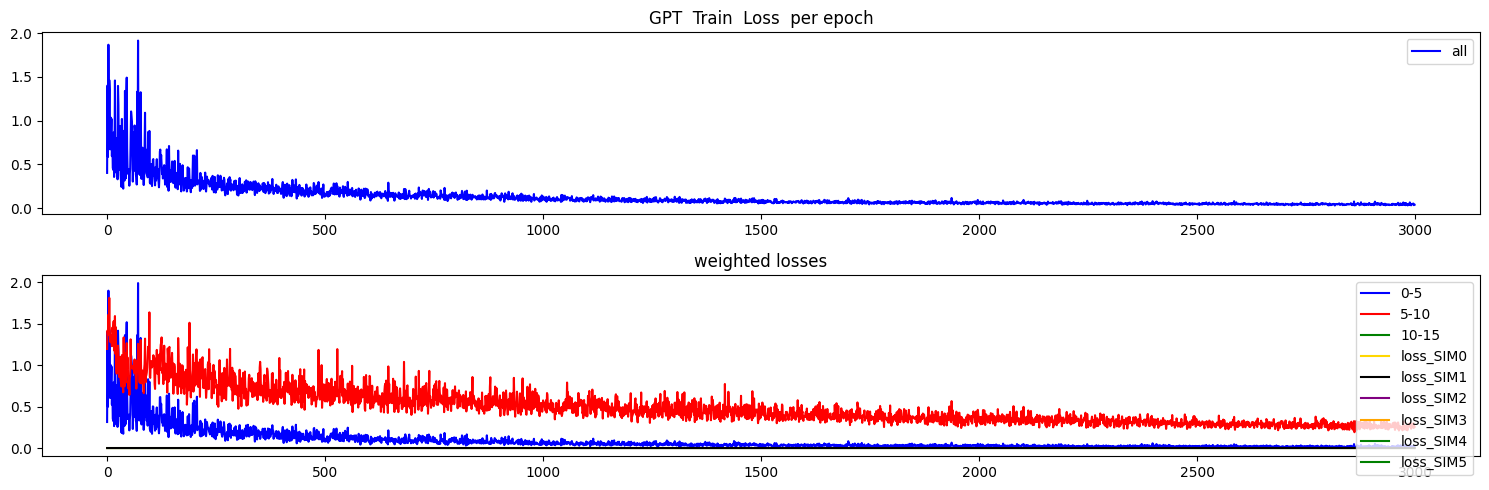

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


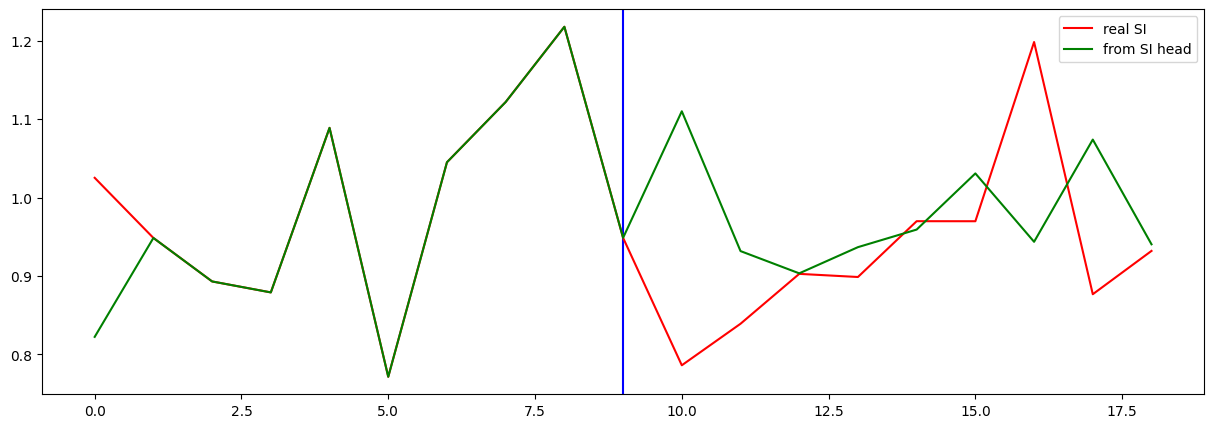

Testing R**2 - (all) - (no inputs):  0.9819268757536791
Testing R**2 - (f2) - SI full (no inputs):  -1.9735591123925391
Testing R**2 - SI head only (no inputs):  -0.4951568846914838
0 ...index R**2 (no inputs):  -0.6566351666816779
1 ...index R**2 (no inputs):  -0.8497708009924321
2 ...index R**2 (no inputs):  -1.9735591123925391
3 ...index R**2 (no inputs):  -679.5456483809688
4 ...index R**2 (no inputs):  -14.179541425005121
5 ...index R**2 (no inputs):  -66.3942200121647
6 ...index R**2 (no inputs):  -12.253871140735283
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.0820919522633834
10 ...index R**2 (no inputs):  -1.37487685422742
11 ...index R**2 (no inputs):  -84.22235182134632
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.5371115542490768
16 ...index R**2 (no inputs):  0.30305585691449755
17 ...index R**2 (no inputs):  -352.850599133594

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.538264
Loss_SI: 0.4828205108642578 Loss_all: 1.0372525453567505
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.254428
Loss_SI: 0.18138554692268372 Loss_all: 0.9118112921714783
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.206322
Loss_SI: 0.15660877525806427 Loss_all: 0.6537441611289978
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.112724
Loss_SI: 0.059337180107831955 Loss_all: 0.5932100415229797
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.078418
Loss_SI: 0.039471063762903214 Loss_all: 0.42893651127815247
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.095730
Loss_SI: 0.050998736172914505 Loss_all: 0.49831047654151917
Prediction shape: torch.Size([32, 35])
===


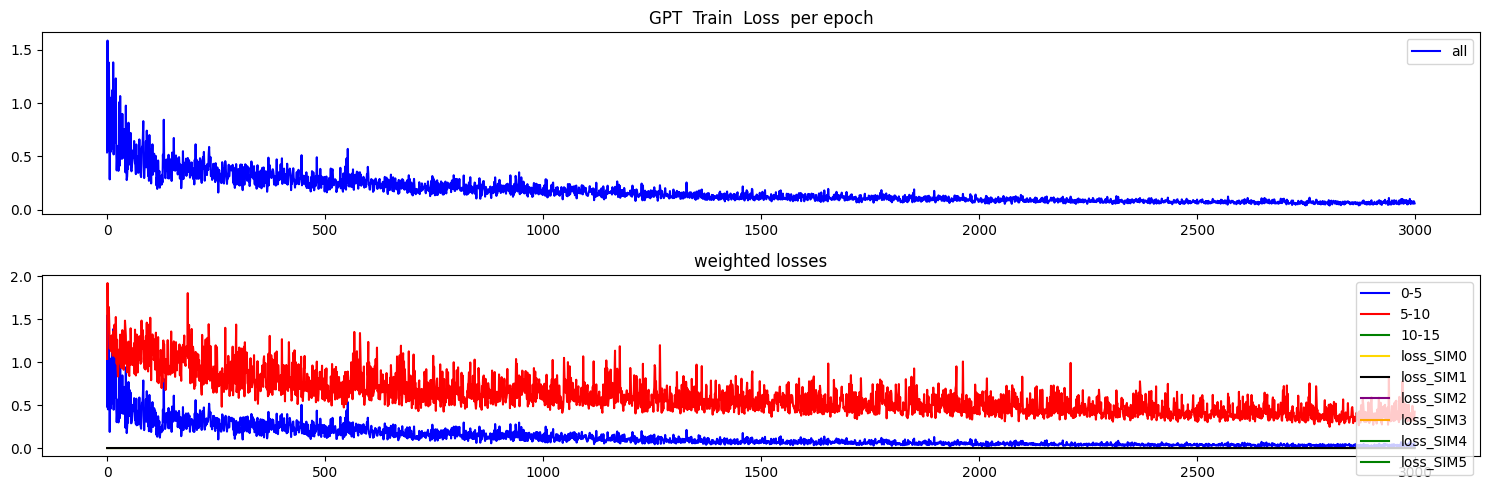

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


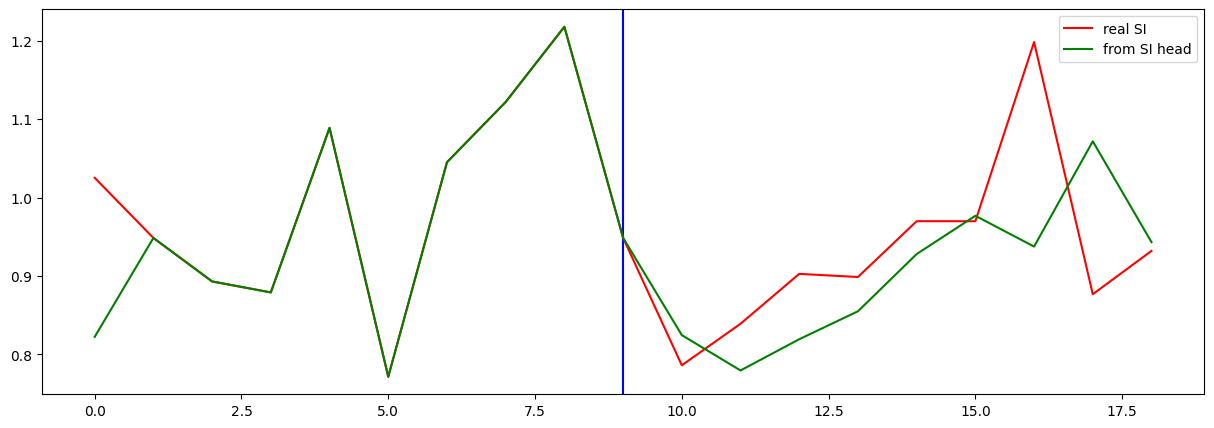

Testing R**2 - (all) - (no inputs):  0.9688848866354803
Testing R**2 - (f2) - SI full (no inputs):  0.042093456008736374
Testing R**2 - SI head only (no inputs):  -0.27768848488403886
0 ...index R**2 (no inputs):  -0.3794909141819147
1 ...index R**2 (no inputs):  -1.2113065539359855
2 ...index R**2 (no inputs):  0.042093456008736374
3 ...index R**2 (no inputs):  -466.1140478483457
4 ...index R**2 (no inputs):  -1.4565994874445498
5 ...index R**2 (no inputs):  -115.30114588410561
6 ...index R**2 (no inputs):  -0.5705677300433836
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16357782316504066
10 ...index R**2 (no inputs):  0.13513172056301548
11 ...index R**2 (no inputs):  -63.61756666256669
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.808168909225089
16 ...index R**2 (no inputs):  0.0006211635902357848
17 ...index R**2 (no inputs):  -46.646

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.773213
Loss_SI: 0.7387681007385254 Loss_all: 1.083214521408081
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.275343
Loss_SI: 0.21643011271953583 Loss_all: 0.8055589199066162
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.166169
Loss_SI: 0.10366500169038773 Loss_all: 0.7287083268165588
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.142730
Loss_SI: 0.08923263847827911 Loss_all: 0.6242015361785889
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.114532
Loss_SI: 0.049144066870212555 Loss_all: 0.7030227780342102
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.158173
Loss_SI: 0.06945618242025375 Loss_all: 0.9566227793693542
Prediction shape: torch.Size([32, 35])
===


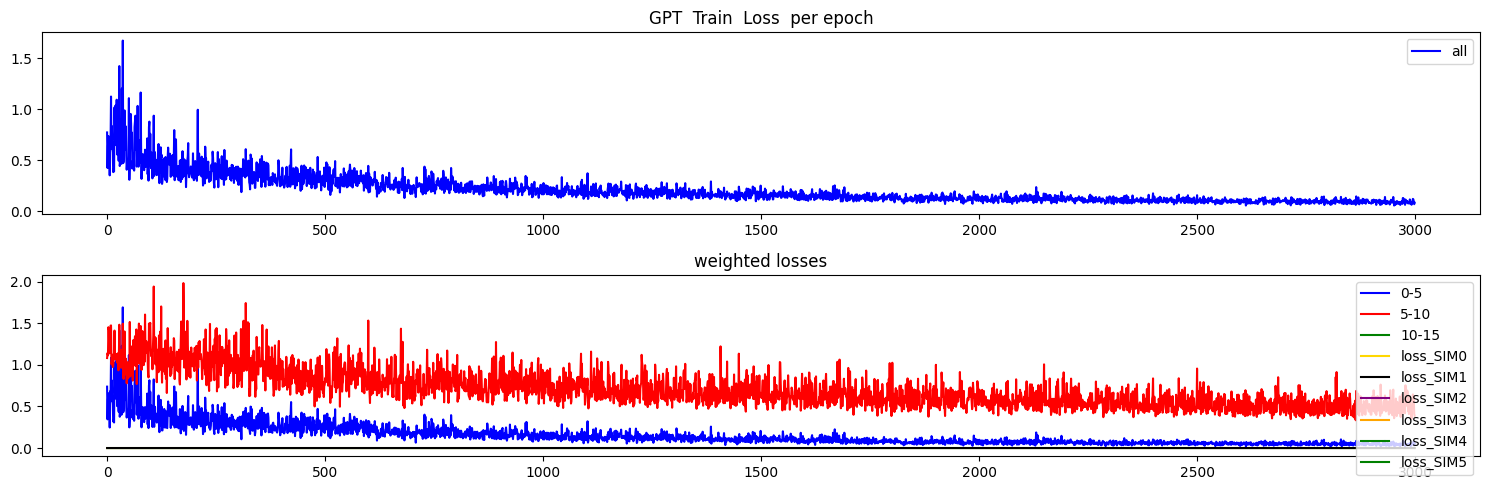

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


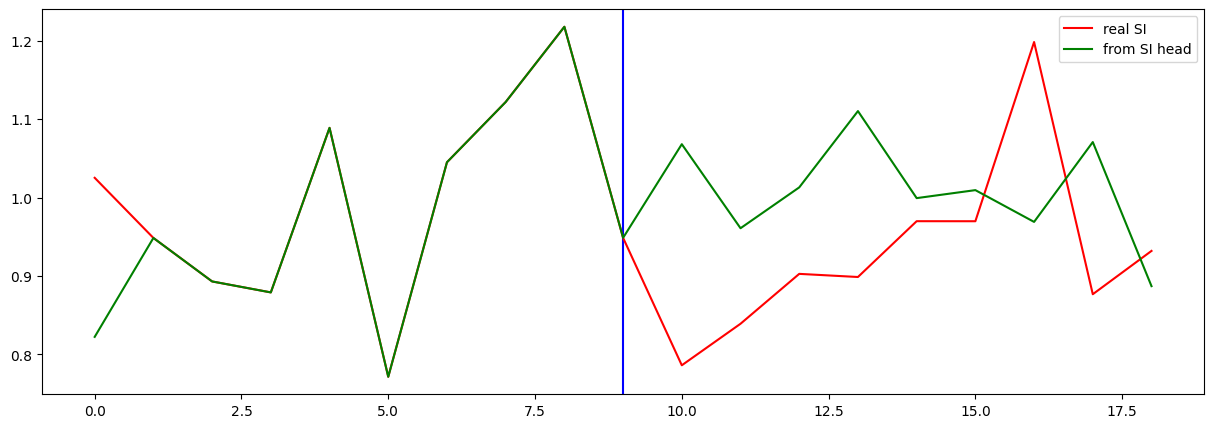

Testing R**2 - (all) - (no inputs):  0.9915913314890796
Testing R**2 - (f2) - SI full (no inputs):  -1.3604603162270417
Testing R**2 - SI head only (no inputs):  -0.8995477048882845
0 ...index R**2 (no inputs):  0.061068900733244225
1 ...index R**2 (no inputs):  -0.2042316566736082
2 ...index R**2 (no inputs):  -1.3604603162270417
3 ...index R**2 (no inputs):  -3311.9662993850225
4 ...index R**2 (no inputs):  -3.7955926060018
5 ...index R**2 (no inputs):  -30.29252950154772
6 ...index R**2 (no inputs):  -1.4373014087274942
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2888671604002484
10 ...index R**2 (no inputs):  0.1589890035112379
11 ...index R**2 (no inputs):  -3.067474185531978
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3884945786000713
16 ...index R**2 (no inputs):  0.018878322246459467
17 ...index R**2 (no inputs):  -82.6605434704

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [48]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [49]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.05831475575389122


In [50]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.7617283169984872


In [51]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -1.630578396341623


In [52]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.1781154060202259



## First Few R2


In [81]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [82]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -0.12074449357927142
2 .....R² on first n steps: 0.09668573476794917
3 .....R² on first n steps: 0.11647234468345413
4 .....R² on first n steps: 0.07031767280427004
5 .....R² on first n steps: -0.0047009991778697025
6 .....R² on first n steps: -0.05132166077928302
7 .....R² on first n steps: -0.11440432234982856
8 .....R² on first n steps: -0.12133773058727604
9 .....R² on first n steps: -0.05831475575389122


In [83]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.13217449873138654
2 .....R² on first n steps: 0.24483018806807322
3 .....R² on first n steps: 0.35014141775018914
4 .....R² on first n steps: 0.34143579115680467
5 .....R² on first n steps: 0.22308864301197517
6 .....R² on first n steps: -0.02817036446597454
7 .....R² on first n steps: -0.31557039308590595
8 .....R² on first n steps: -0.5045560923877328
9 .....R² on first n steps: -0.7617283169984872


In [84]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: 0.30377819972643805
2 .....R² on first n steps: -0.10975678461716698
3 .....R² on first n steps: -0.17307534154062476
4 .....R² on first n steps: -0.45771531431335344
5 .....R² on first n steps: -0.662193562517339
6 .....R² on first n steps: -1.1245778094942236
7 .....R² on first n steps: -1.567697715384715
8 .....R² on first n steps: -1.684619603770829
9 .....R² on first n steps: -1.630578396341623


In [85]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: 0.5212198620533413
2 .....R² on first n steps: 0.2023782322651092
3 .....R² on first n steps: 0.18880049359924467
4 .....R² on first n steps: 0.18686812130985786
5 .....R² on first n steps: 0.10704189029008215
6 .....R² on first n steps: -0.06441465829433146
7 .....R² on first n steps: -0.21237404743546873
8 .....R² on first n steps: -0.2166219519243353
9 .....R² on first n steps: -0.1781154060202259
